Clustering analysis

In [32]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Combined_data_new.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [98]:
#standardize data: (x-mean(x))/std
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 1001 to 56045
Data columns (total 65 columns):
State                                3143 non-null object
County                               3143 non-null object
PCT_LACCESS_POP15                    3102 non-null float64
PCT_LACCESS_LOWI15                   3123 non-null float64
PCT_LACCESS_HHNV15                   3140 non-null float64
PCT_LACCESS_SNAP15                   3123 non-null float64
PCT_LACCESS_CHILD15                  3124 non-null float64
PCT_LACCESS_SENIORS15                3124 non-null float64
PCT_LACCESS_WHITE15                  3124 non-null float64
PCT_LACCESS_BLACK15                  3124 non-null float64
PCT_LACCESS_HISP15                   3124 non-null float64
PCT_LACCESS_NHASIAN15                3124 non-null float64
PCT_LACCESS_NHNA15                   3124 non-null float64
PCT_LACCESS_NHPI15                   3124 non-null float64
PCT_LACCESS_MULTIR15                 3124 non-null float64
GROCPT

In [99]:
#transform categorical variable into dummy variables
df_dummy = pd.get_dummies(df[['Division','Region','']], drop_first=True)

In [102]:
for c in df_dummy.columns:
    print (c)

PCT_LACCESS_POP15
PCT_LACCESS_LOWI15
PCT_LACCESS_HHNV15
PCT_LACCESS_SNAP15
PCT_LACCESS_CHILD15
PCT_LACCESS_SENIORS15
PCT_LACCESS_WHITE15
PCT_LACCESS_BLACK15
PCT_LACCESS_HISP15
PCT_LACCESS_NHASIAN15
PCT_LACCESS_NHNA15
PCT_LACCESS_NHPI15
PCT_LACCESS_MULTIR15
GROCPTH14
SUPERCPTH14
CONVSPTH14
SPECSPTH14
SNAPSPTH16
WICSPTH12
FFRPTH14
FSRPTH14
PC_FFRSALES12
PC_FSRSALES12
PCT_SNAP12
PCT_SNAP16
SNAP_PART_RATE13
PCT_NSLP15
PCT_FREE_LUNCH14
PCT_REDUCED_LUNCH14
PCT_SBP15
PCT_SFSP15
PCT_WIC15
PCT_CACFP15
FOODINSEC_13_15
VLFOODSEC_13_15
FOODINSEC_CHILD_03_11
SODATAX_STORES14
SODATAX_VENDM14
CHIPSTAX_VENDM14
FOOD_TAX14
PCT_LOCLFARM12
PCT_LOCLSALE12
PC_DIRSALES12
FMRKTPTH16
PCT_DIABETES_ADULTS13
PCT_OBESE_ADULTS13
RECFACPTH14
PCT_NHWHITE10
PCT_NHBLACK10
PCT_HISP10
PCT_NHASIAN10
PCT_NHNA10
PCT_NHPI10
PCT_65OLDER10
PCT_18YOUNGER10
MEDHHINC15
POVRATE15
CHILDPOVRATE15
prevalence of diabetes
prevalence of obesity
prevalence of physical inactivity
State_AL
State_AR
State_AZ
State_CA
State_CO
State_CT
State

County_Laurens
County_Lavaca
County_Lawrence
County_Le Flore
County_Le Sueur
County_Lea
County_Leake
County_Leavenworth
County_Lebanon
County_Lee
County_Leelanau
County_Leflore
County_Lehigh
County_Lemhi
County_Lenawee
County_Lenoir
County_Leon
County_Leslie
County_Letcher
County_Levy
County_Lewis
County_Lewis and Clark
County_Lexington
County_Liberty
County_Licking
County_Limestone
County_Lincoln
County_Linn
County_Lipscomb
County_Litchfield
County_Little River
County_Live Oak
County_Livingston
County_Llano
County_Logan
County_Long
County_Lonoke
County_Lorain
County_Los Alamos
County_Los Angeles
County_Loudon
County_Loudoun
County_Louisa
County_Loup
County_Love
County_Loving
County_Lowndes
County_Lubbock
County_Lucas
County_Luce
County_Lumpkin
County_Luna
County_Lunenburg
County_Luzerne
County_Lycoming
County_Lyman
County_Lynchburg
County_Lynn
County_Lyon
County_Mackinac
County_Macomb
County_Macon
County_Macoupin
County_Madera
County_Madison
County_Magoffin
County_Mahaska
County_Mahno

In [36]:
normed_data=preprocessing.scale(df)
normed_df=pd.DataFrame(normed_data, index=df.index, columns=df.columns)

In [37]:
normed_df['level_diabetes']=pd.qcut(normed_df['prevalence of diabetes'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_obesity']=pd.qcut(normed_df['prevalence of obesity'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_phy']=pd.qcut(normed_df['prevalence of physical inactivity'], [0, .25, .5, .75, 1.], labels=False)
lut = dict(zip([0,1,2,3], "bgyr"))

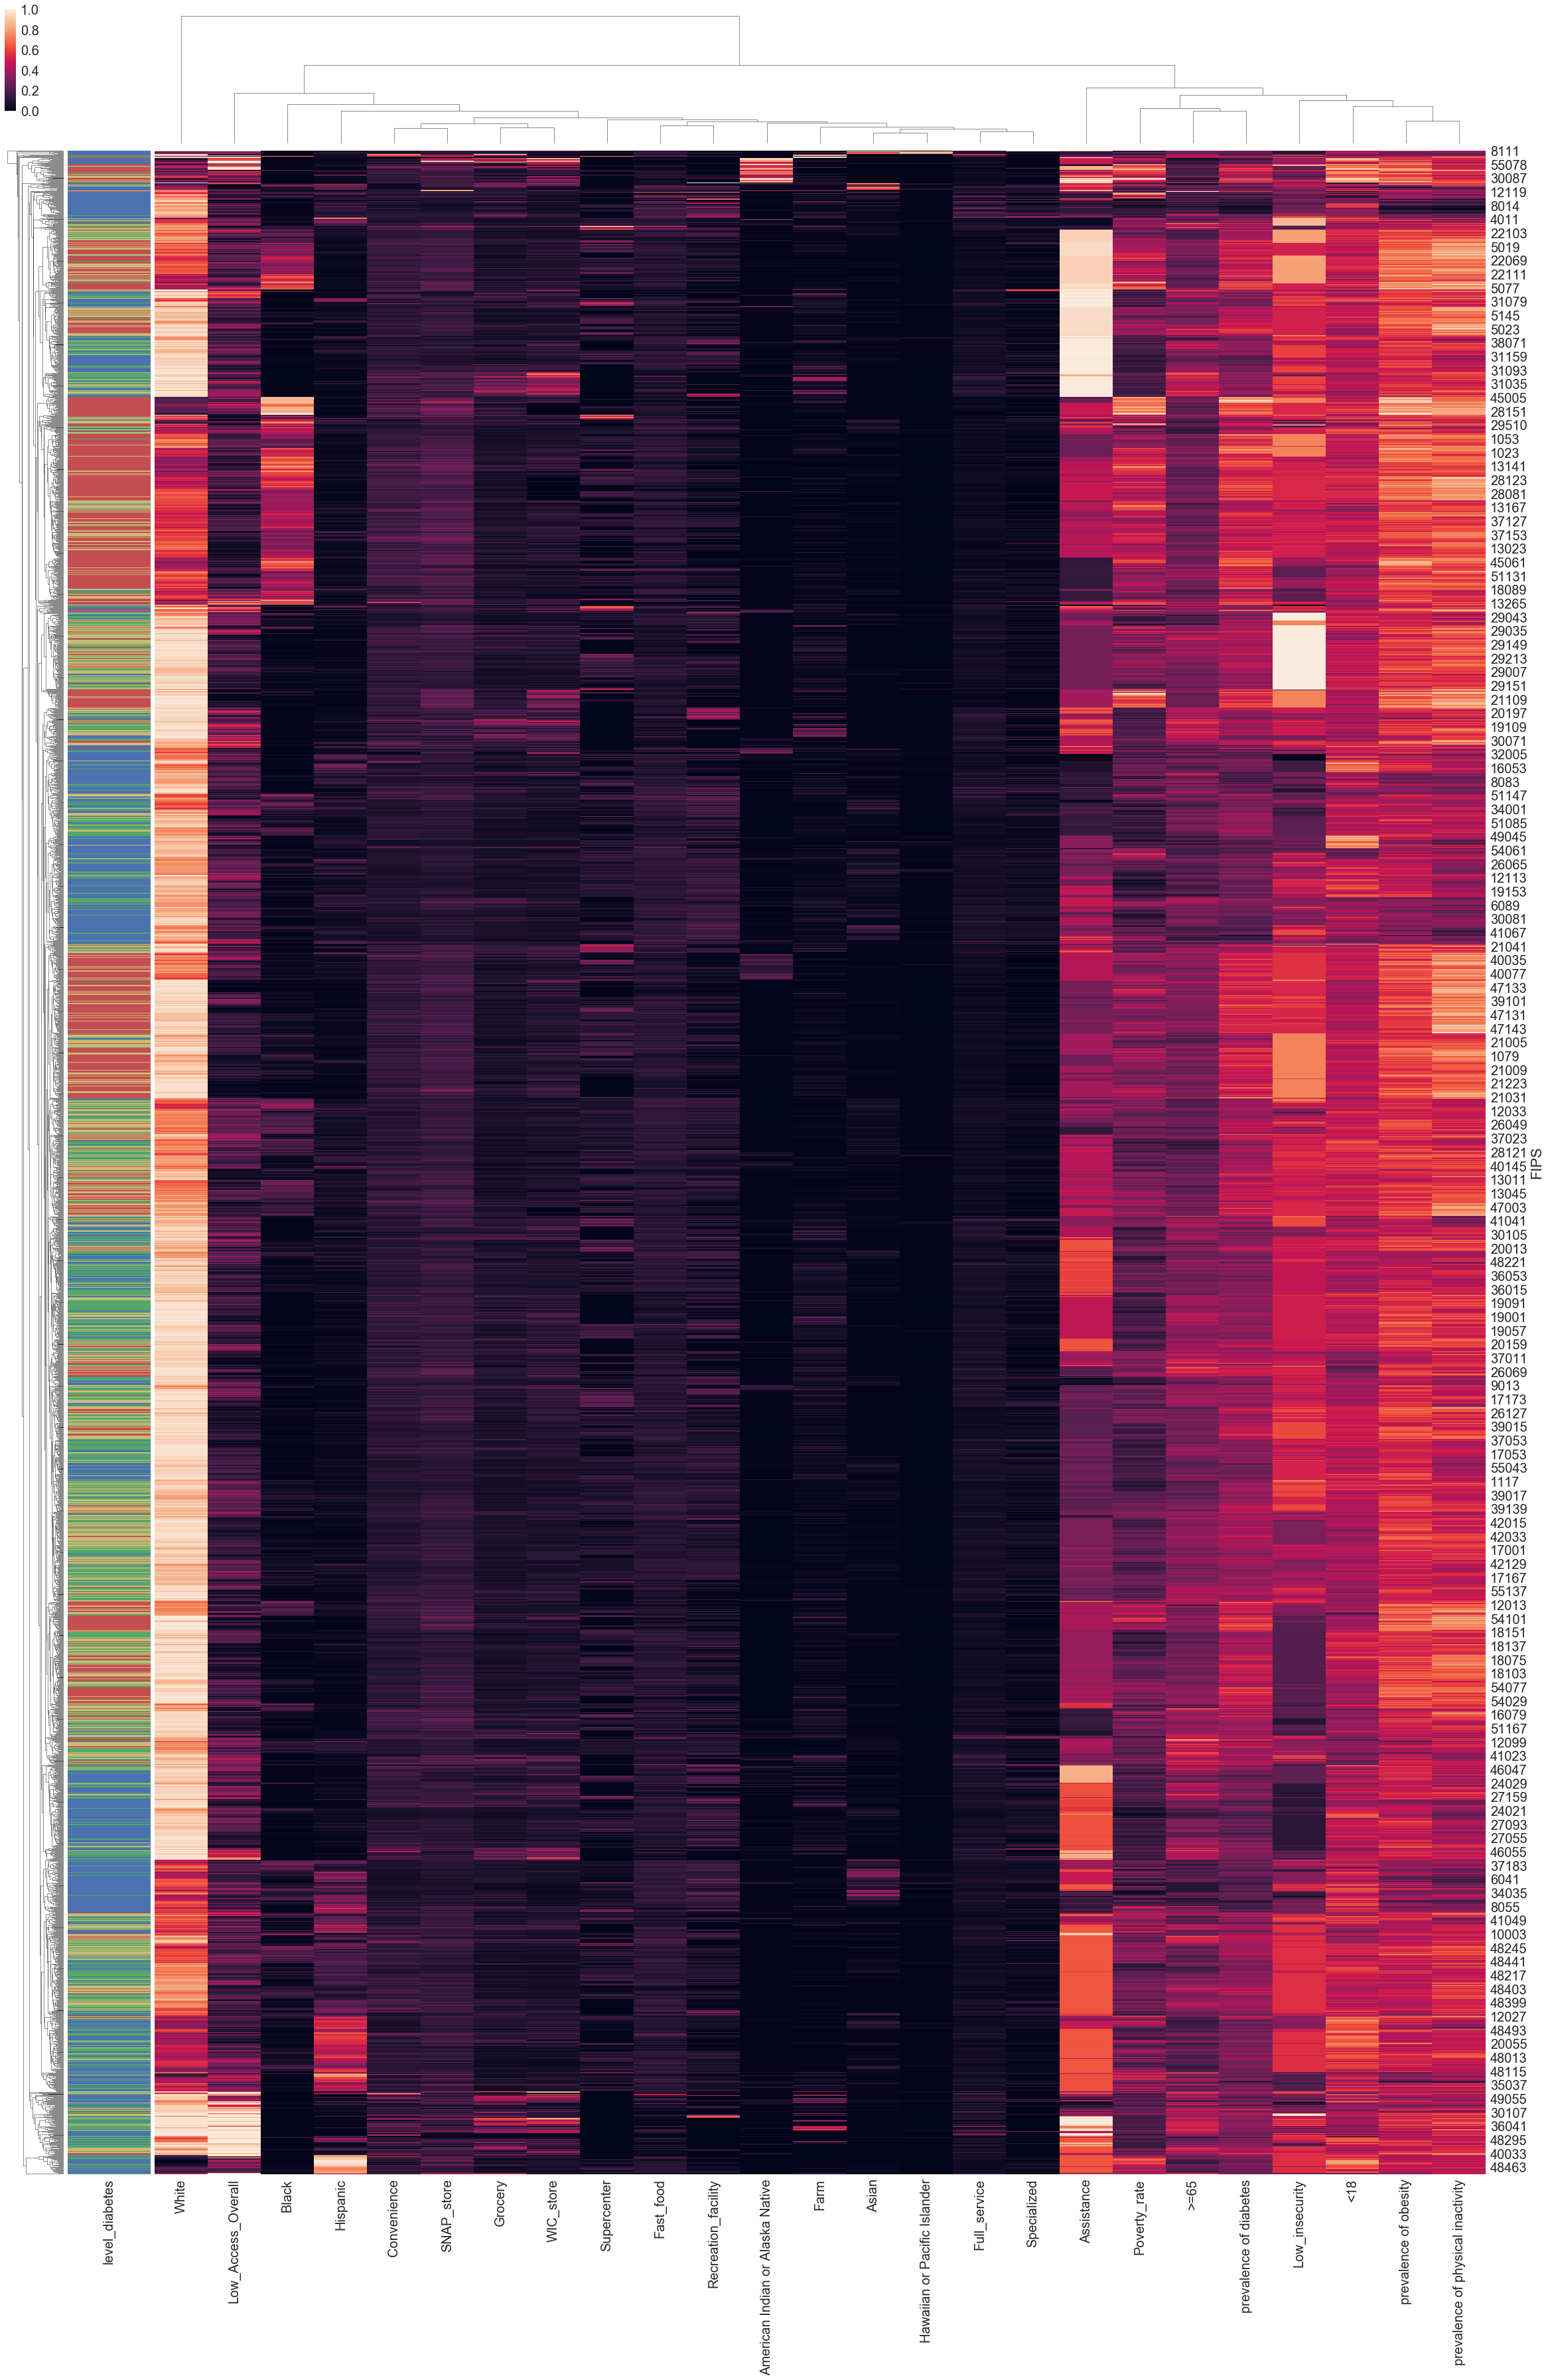

In [38]:
sns.set(font_scale=2)
row_colors = normed_df['level_diabetes'].map(lut)
g = sns.clustermap(normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,60), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
#plt.figure()                                                        
#g = sns.clustermap(normed_df[normed_df.columns.difference(['Low_insecurity', 'level_diabetes','level_obesity','level_phy'])], 
                  # row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})                                                           
                                               
plt.show()

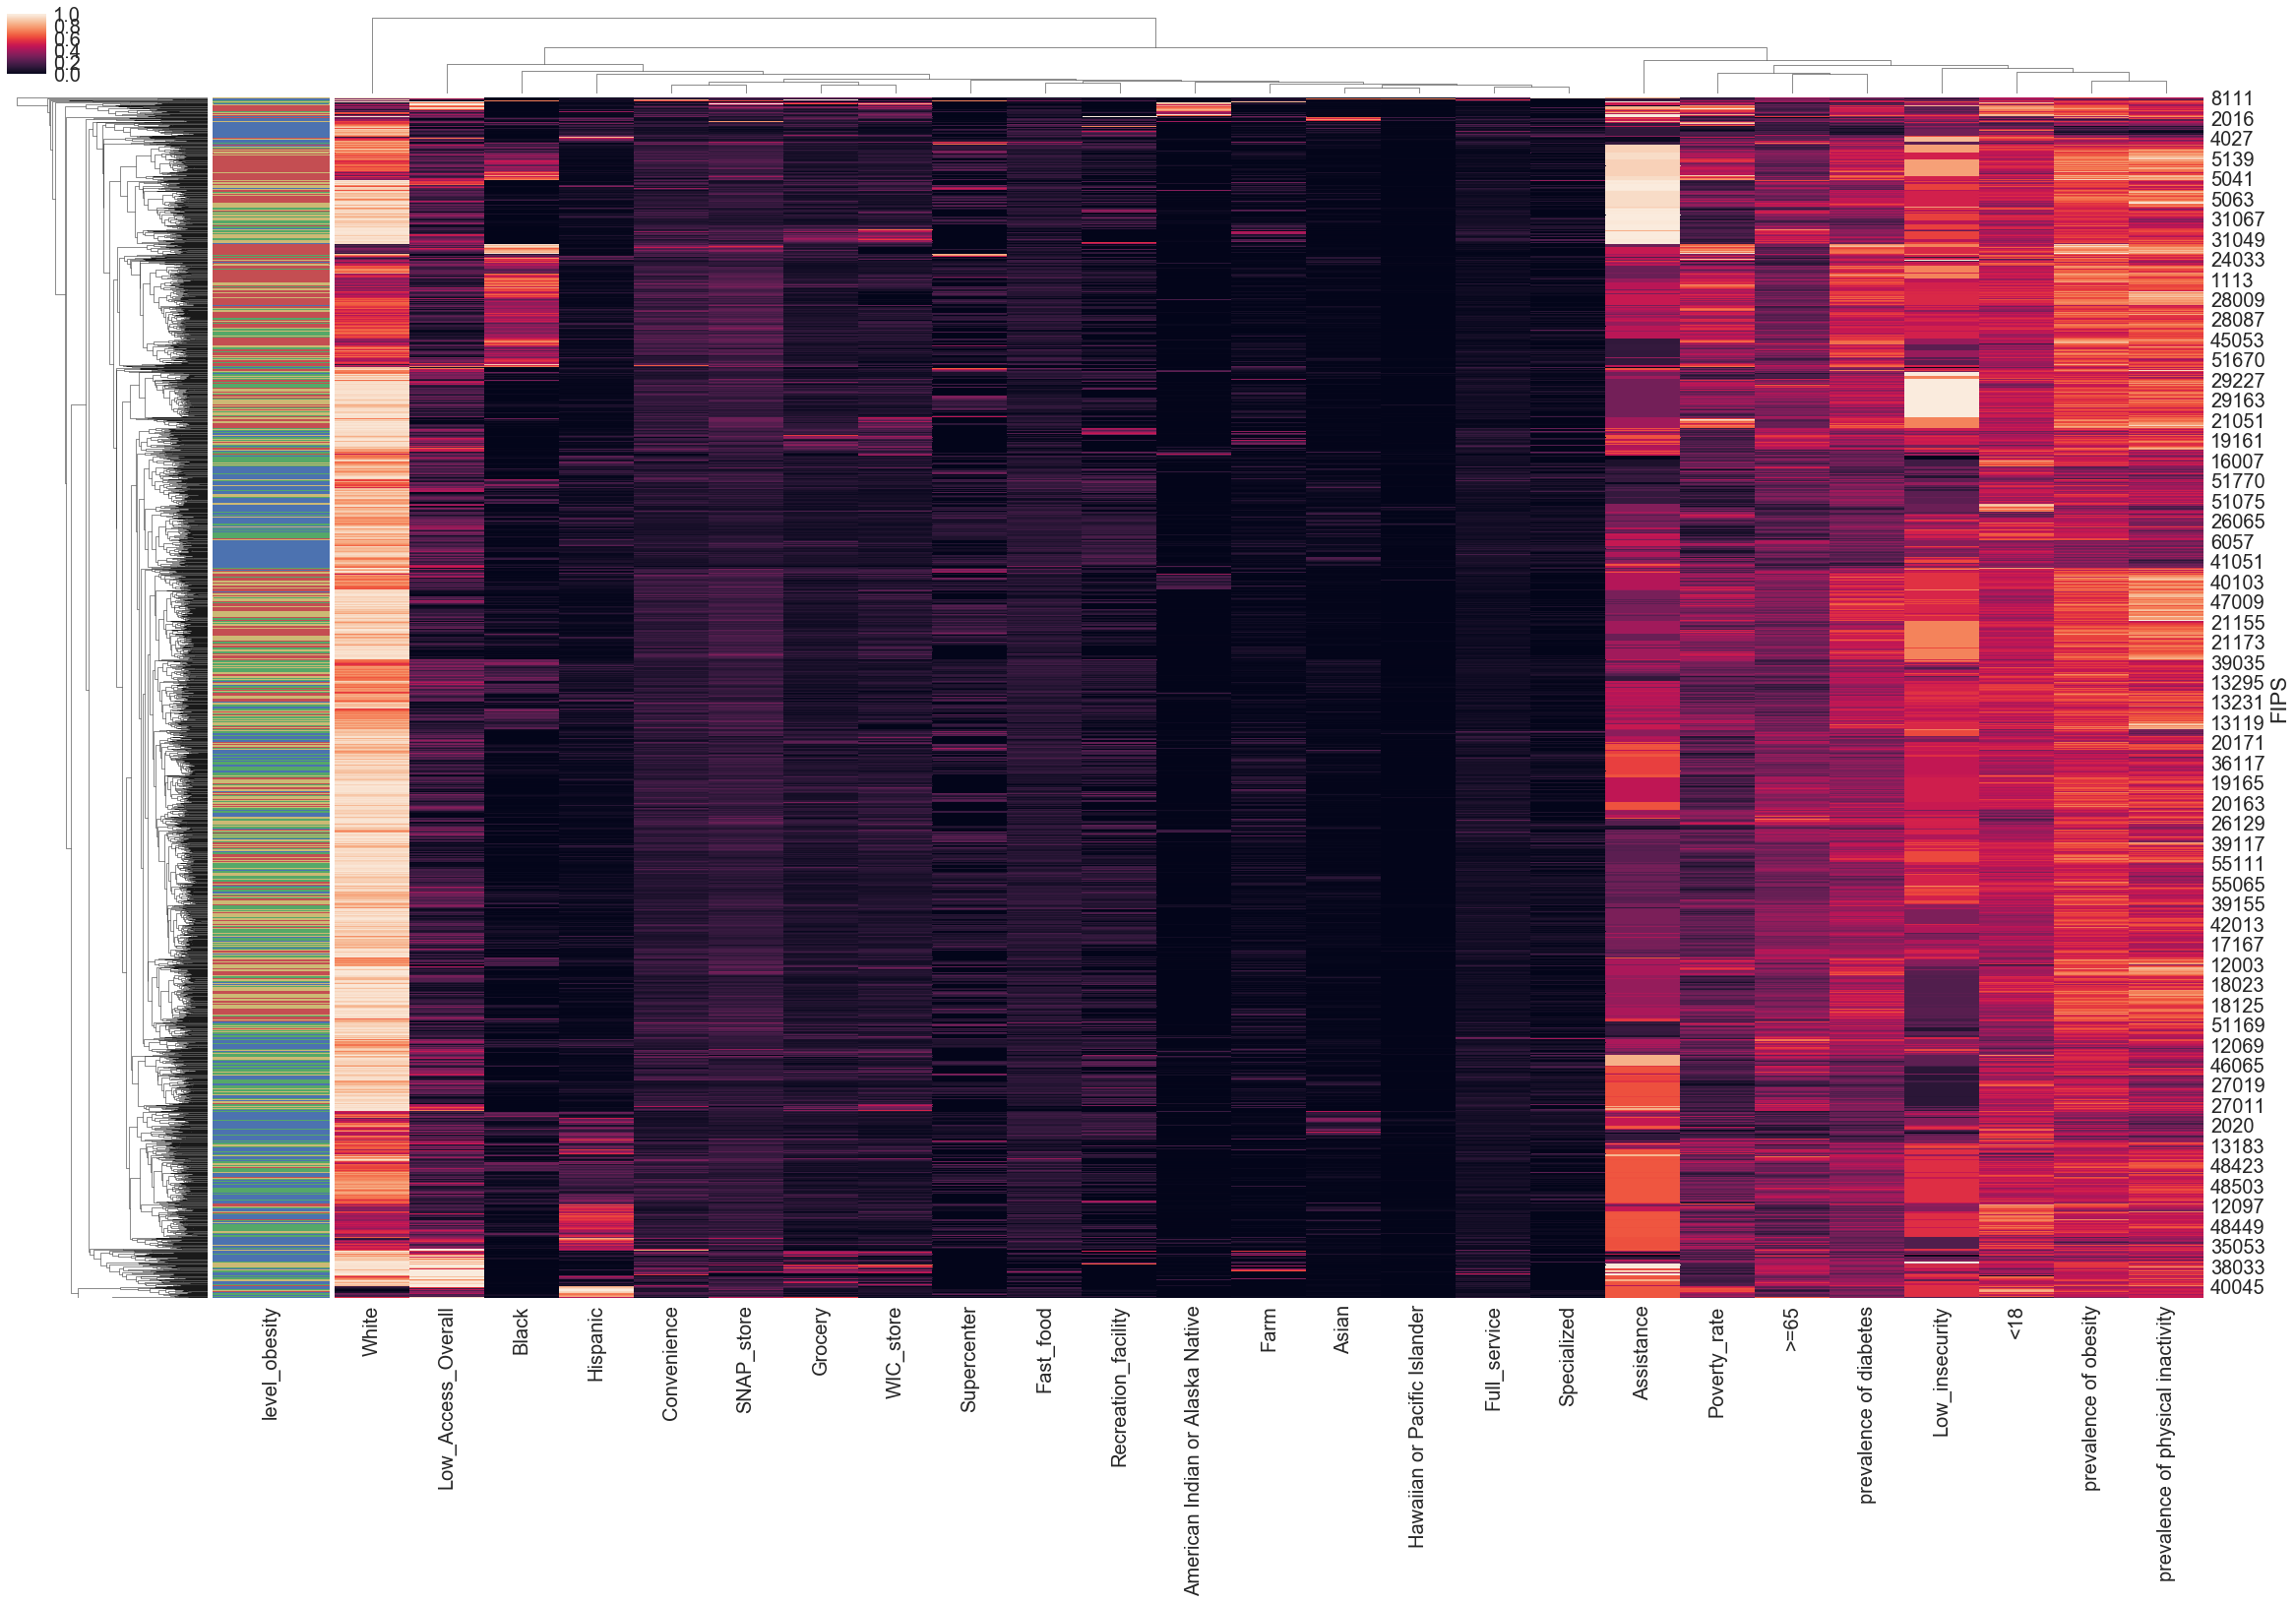

In [39]:
sns.set(font_scale=2)

grouptag='level_obesity'

row_colors = normed_df[grouptag].map(lut)
g = sns.clustermap(normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.show()

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

#'Low_insecurity'
X=normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])]
distance_way= ['ward', 'single', 'average', 'weighted', 'centroid', 'median']

for m in distance_way:
    Z = linkage(X, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print (m, c)

ward 0.351220887987
single 0.83774425746
average 0.888583205925
weighted 0.693621373369
centroid 0.880108838278
median 0.791790171645


average distance is the best meausre to preserve the real distance

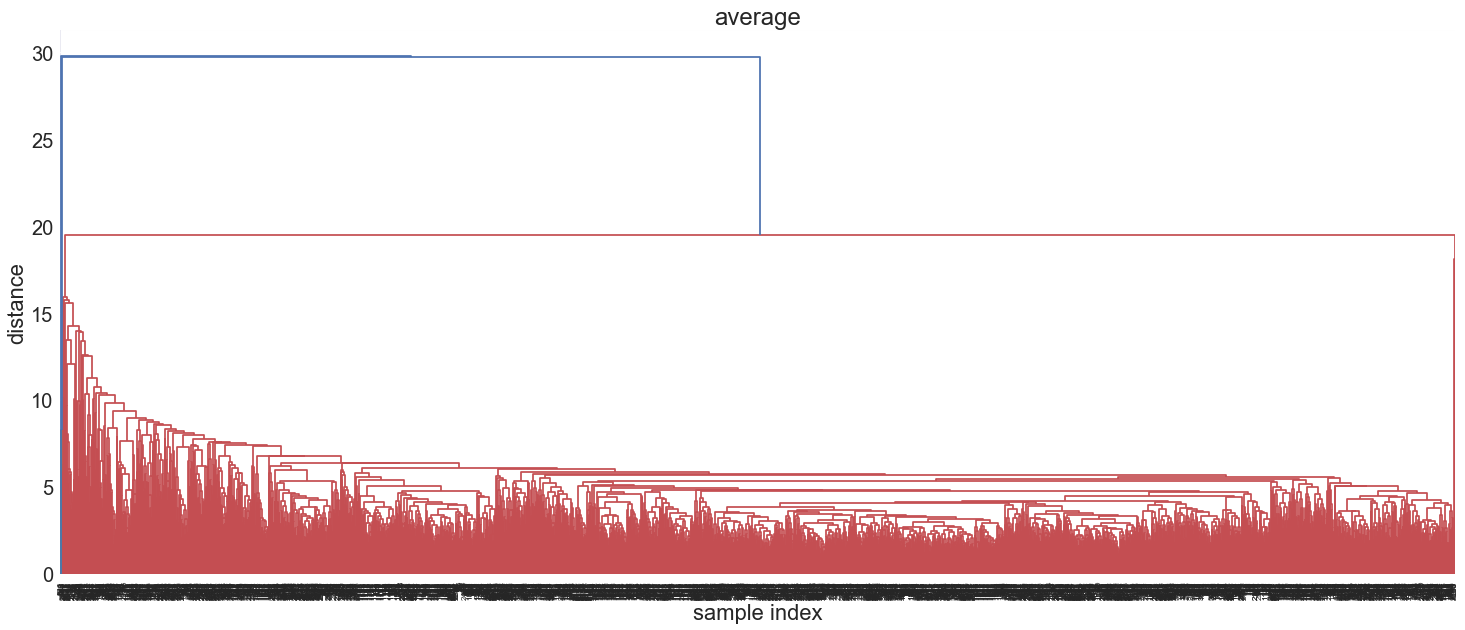

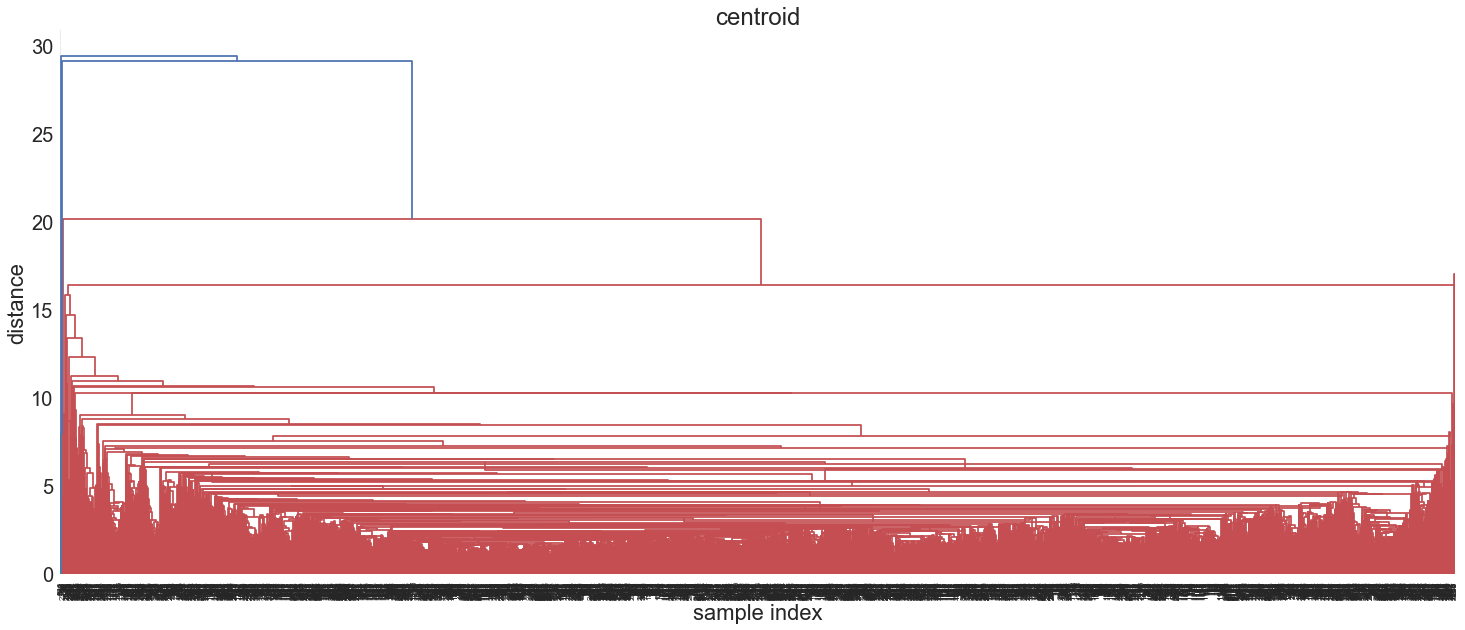

In [41]:
# calculate full dendrogram
Z = linkage(X, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('average')
plt.show()

Z = linkage(X, 'centroid')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('centroid')
plt.show()

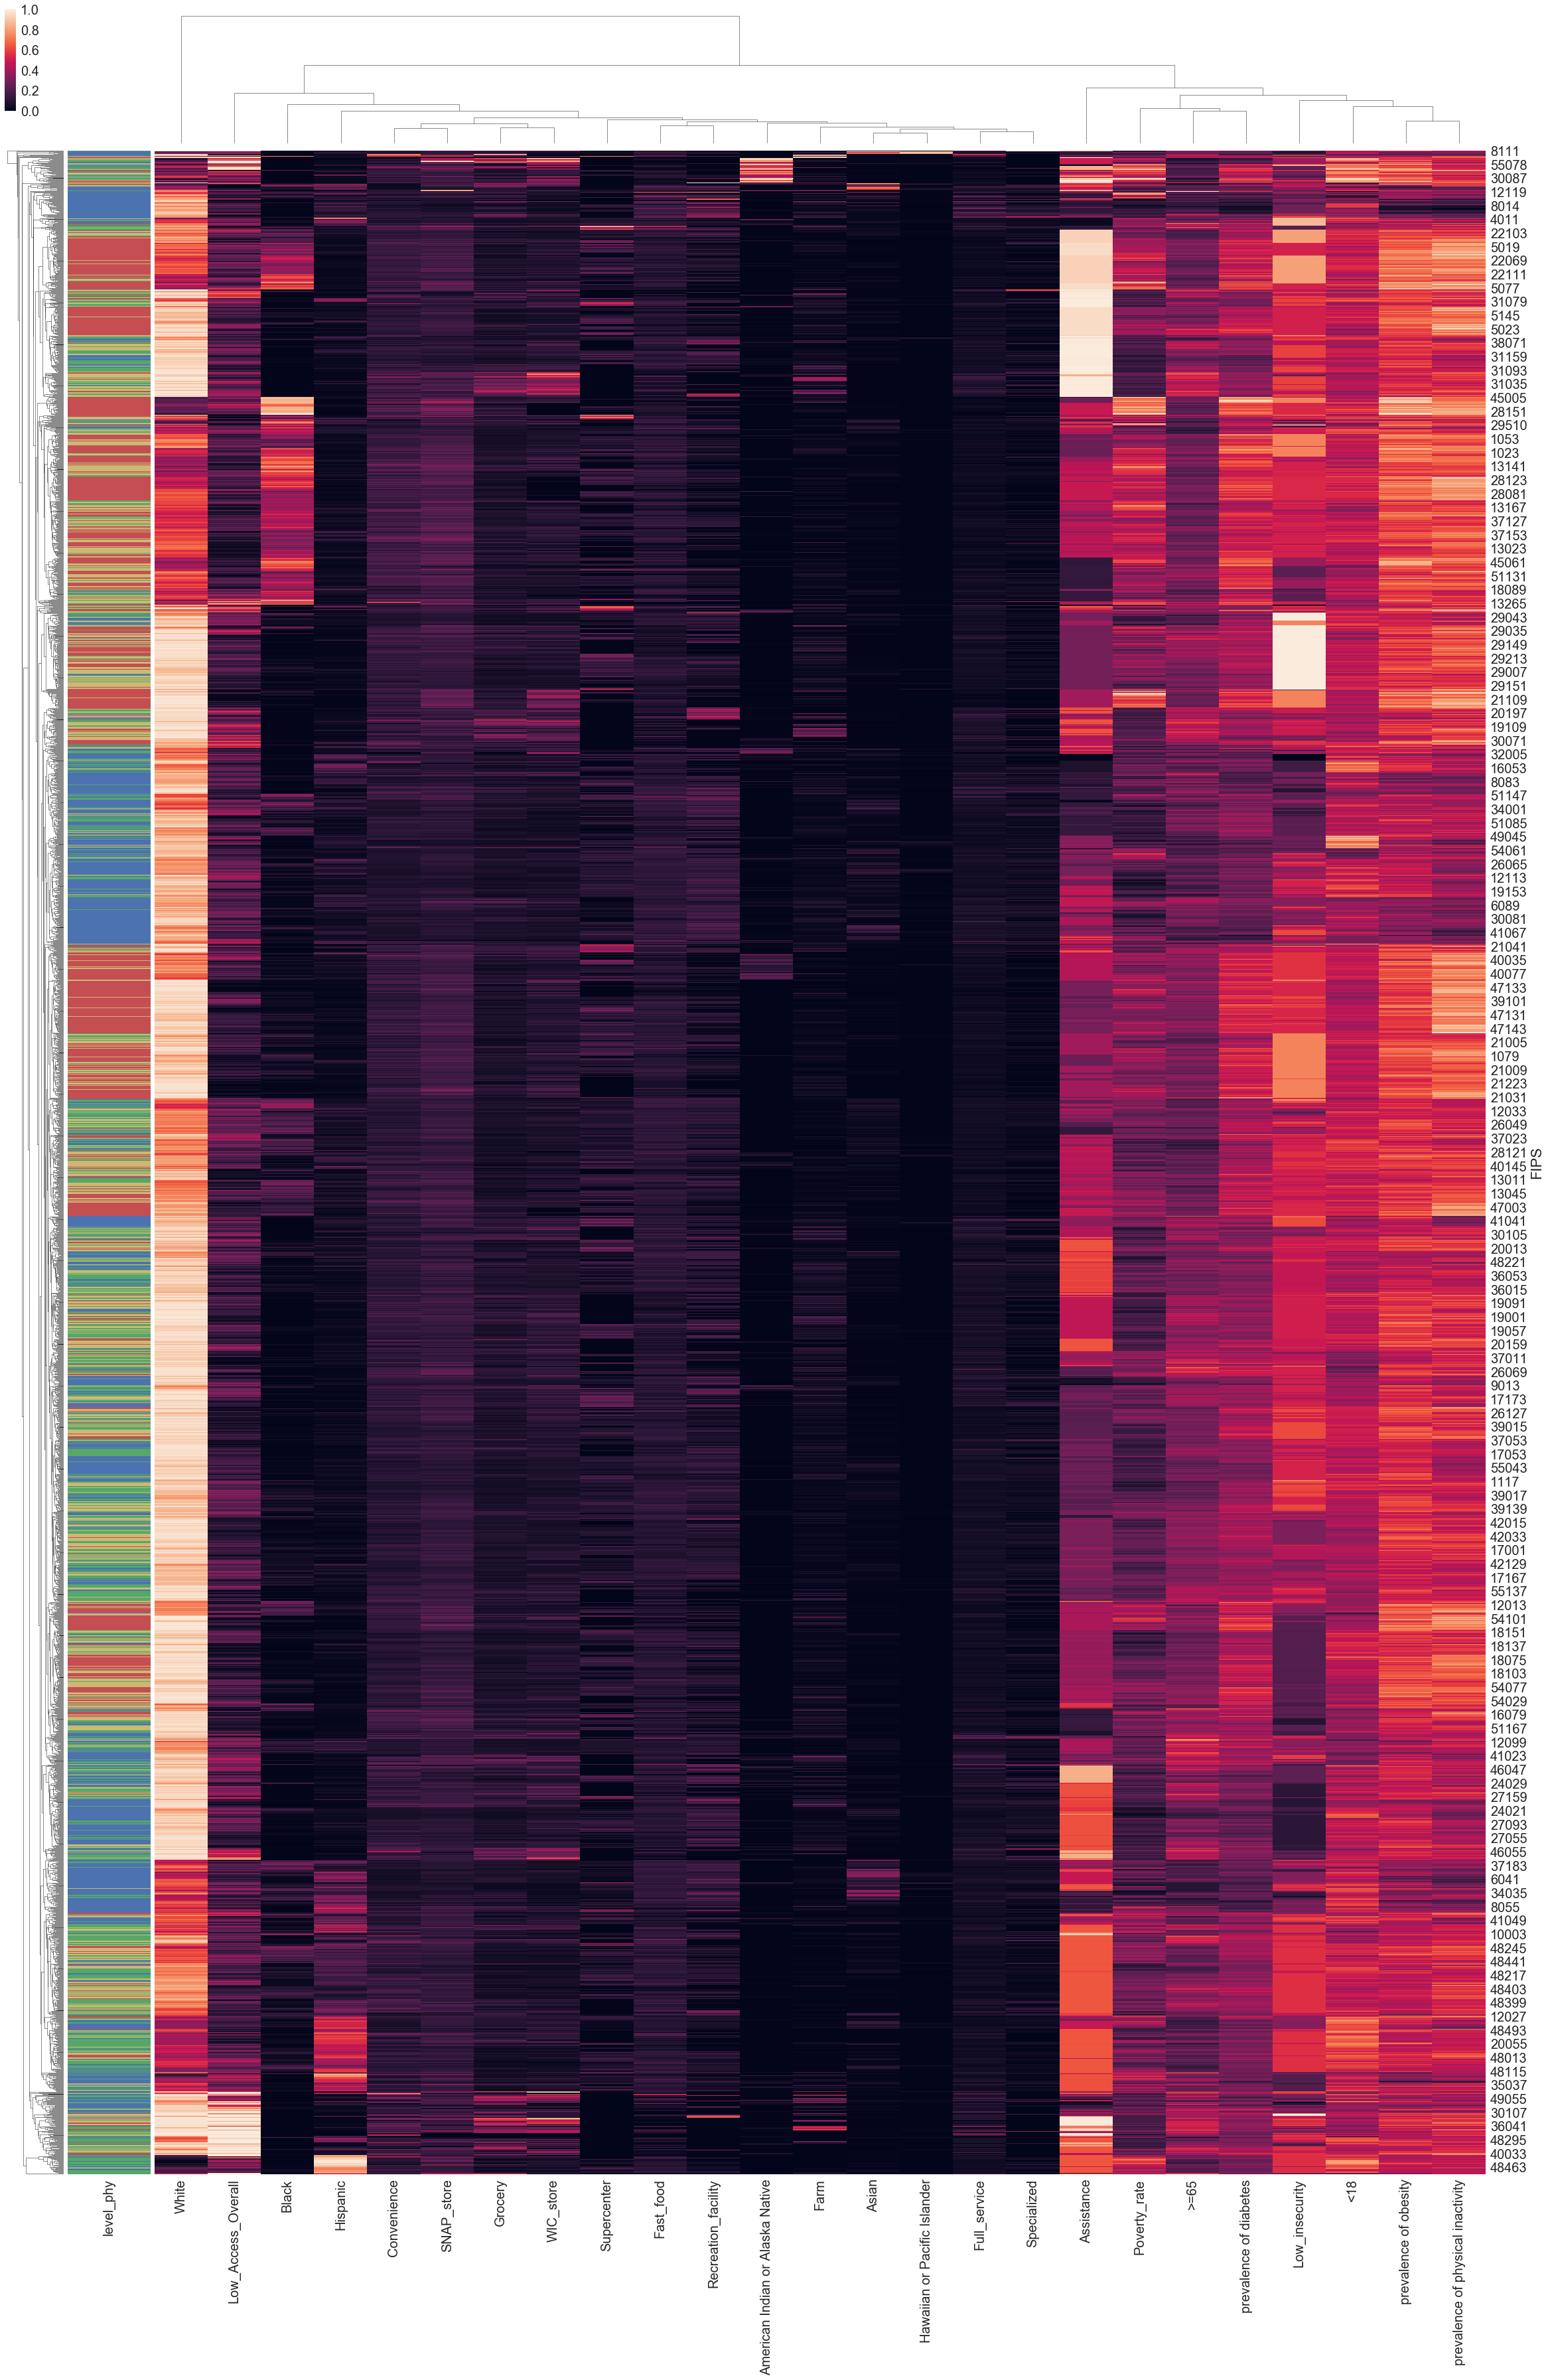

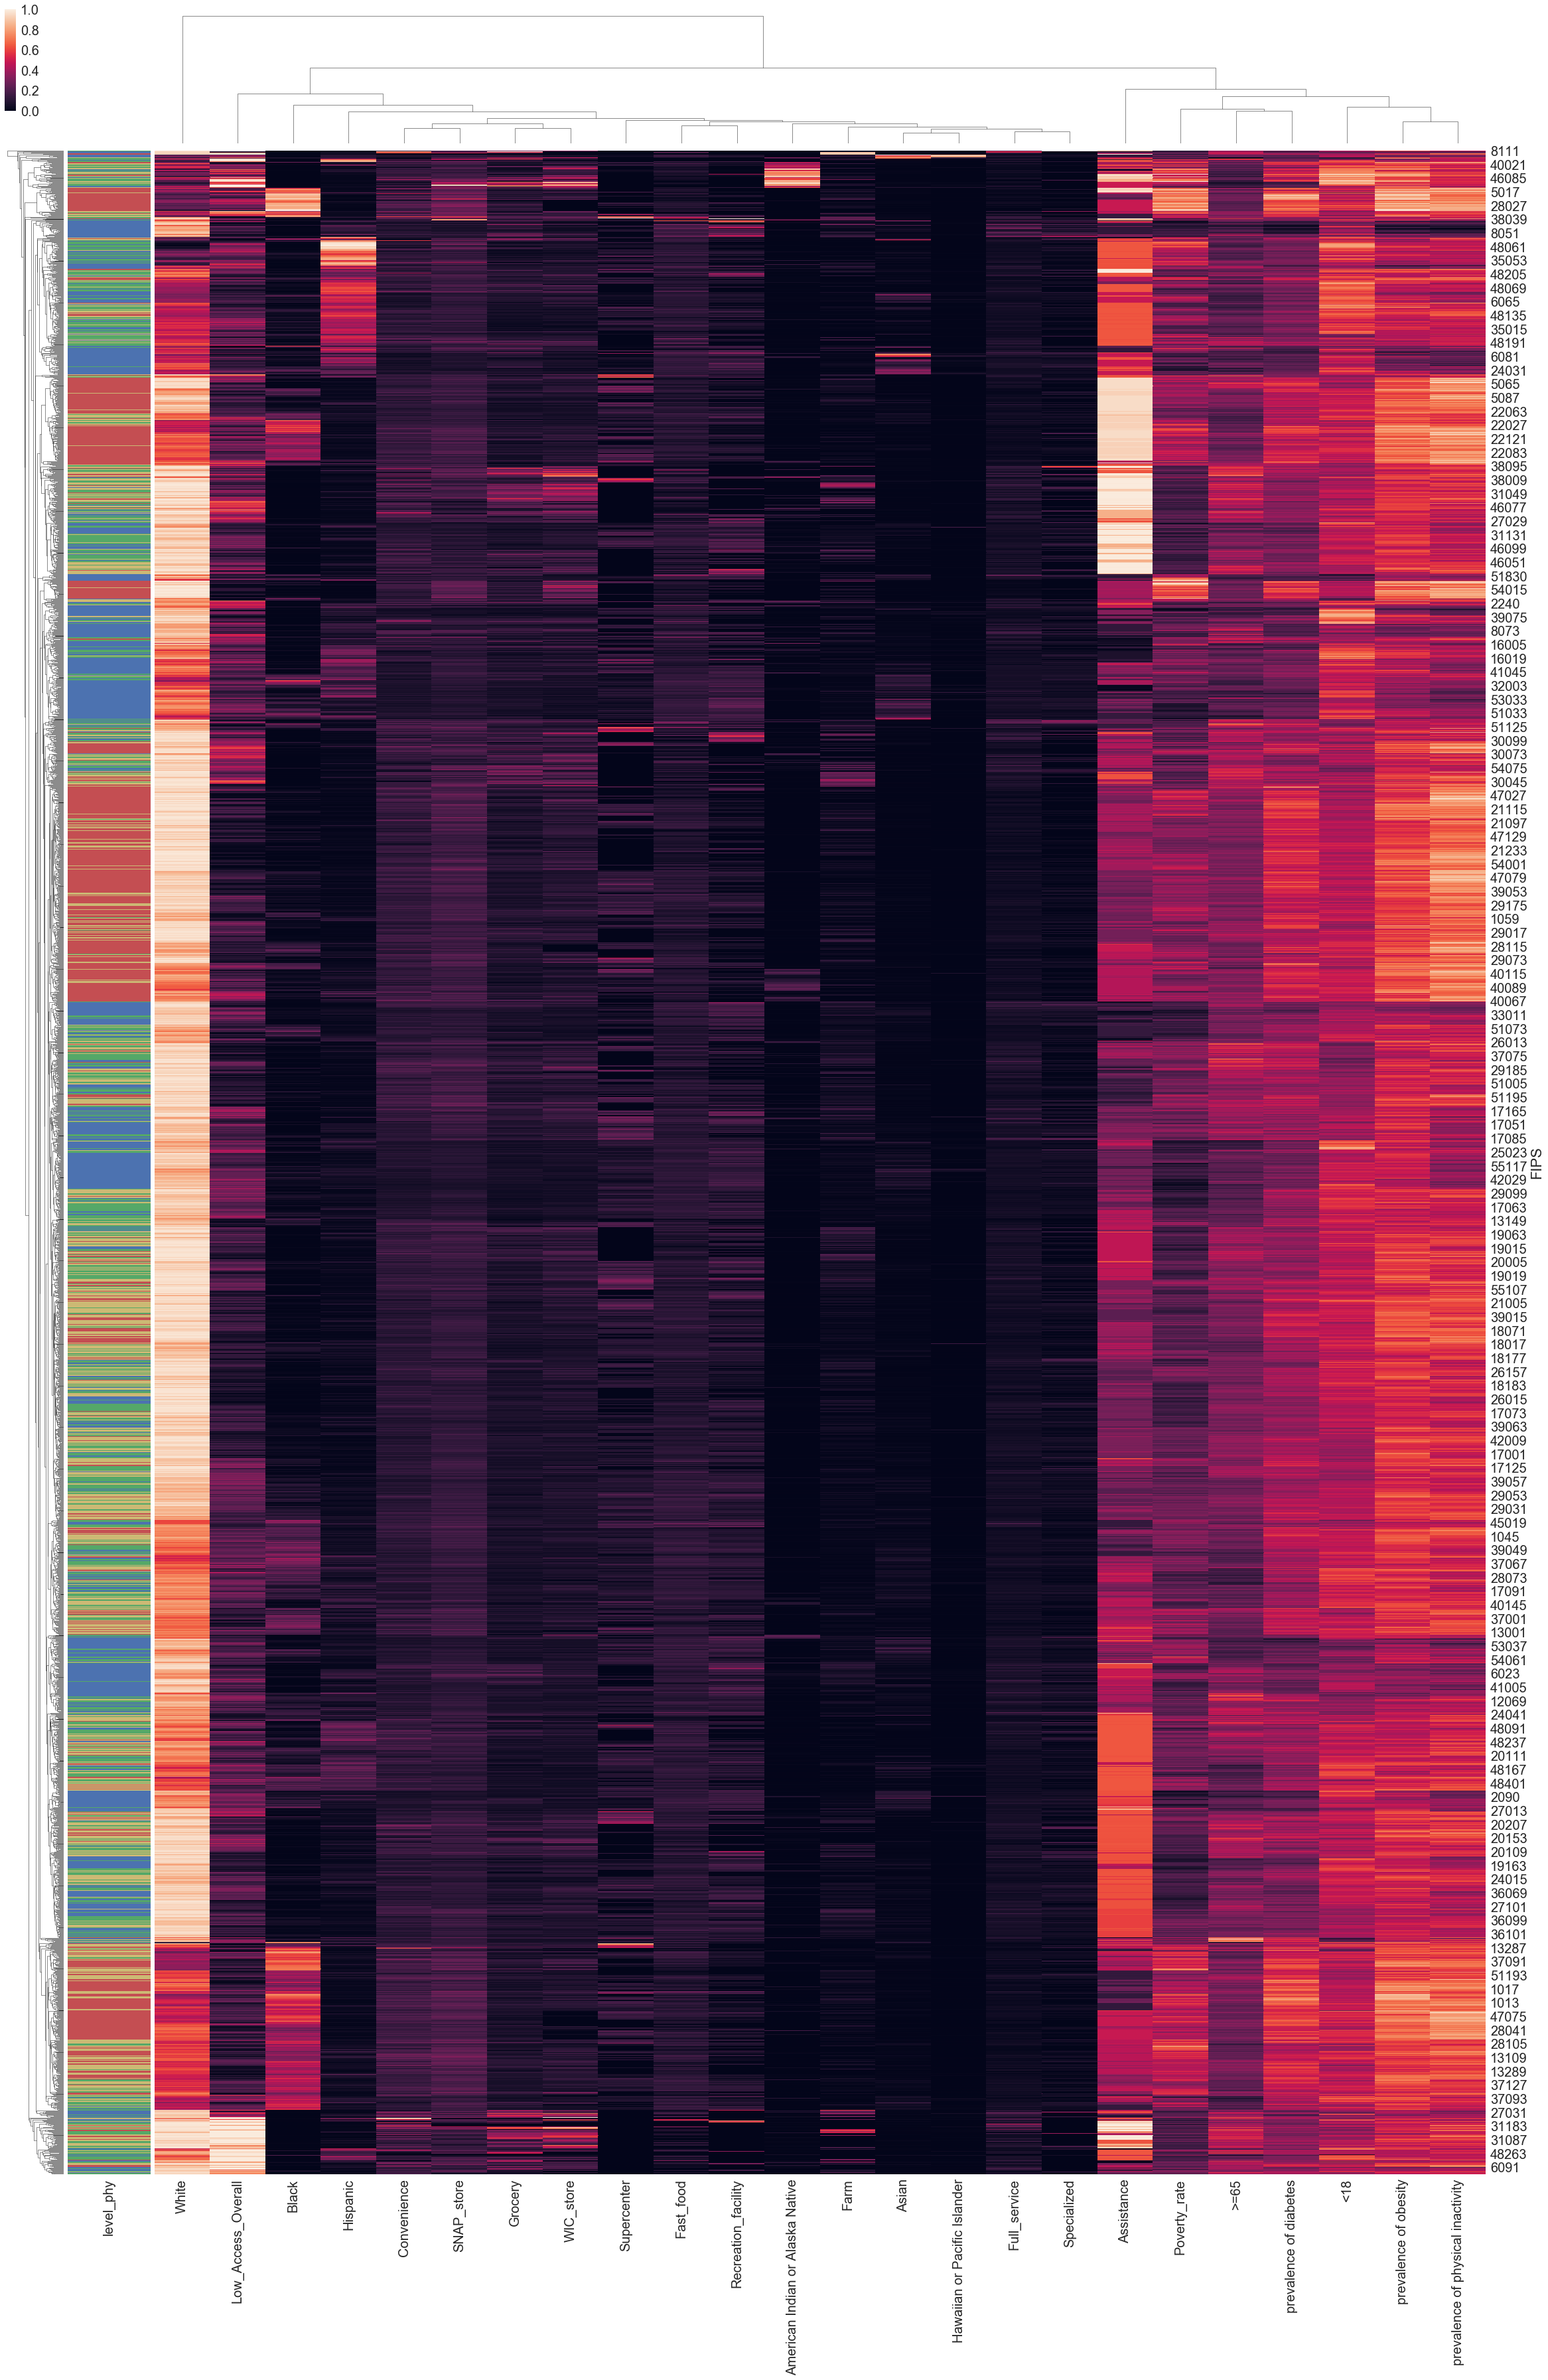

In [28]:
sns.set(font_scale=2)

grouptag='level_phy'

row_colors = normed_df[grouptag].map(lut)


g = sns.clustermap(normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,60), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)

plt.figure()
g = sns.clustermap(normed_df[normed_df.columns.difference(['Low_insecurity','level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,60), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.show()

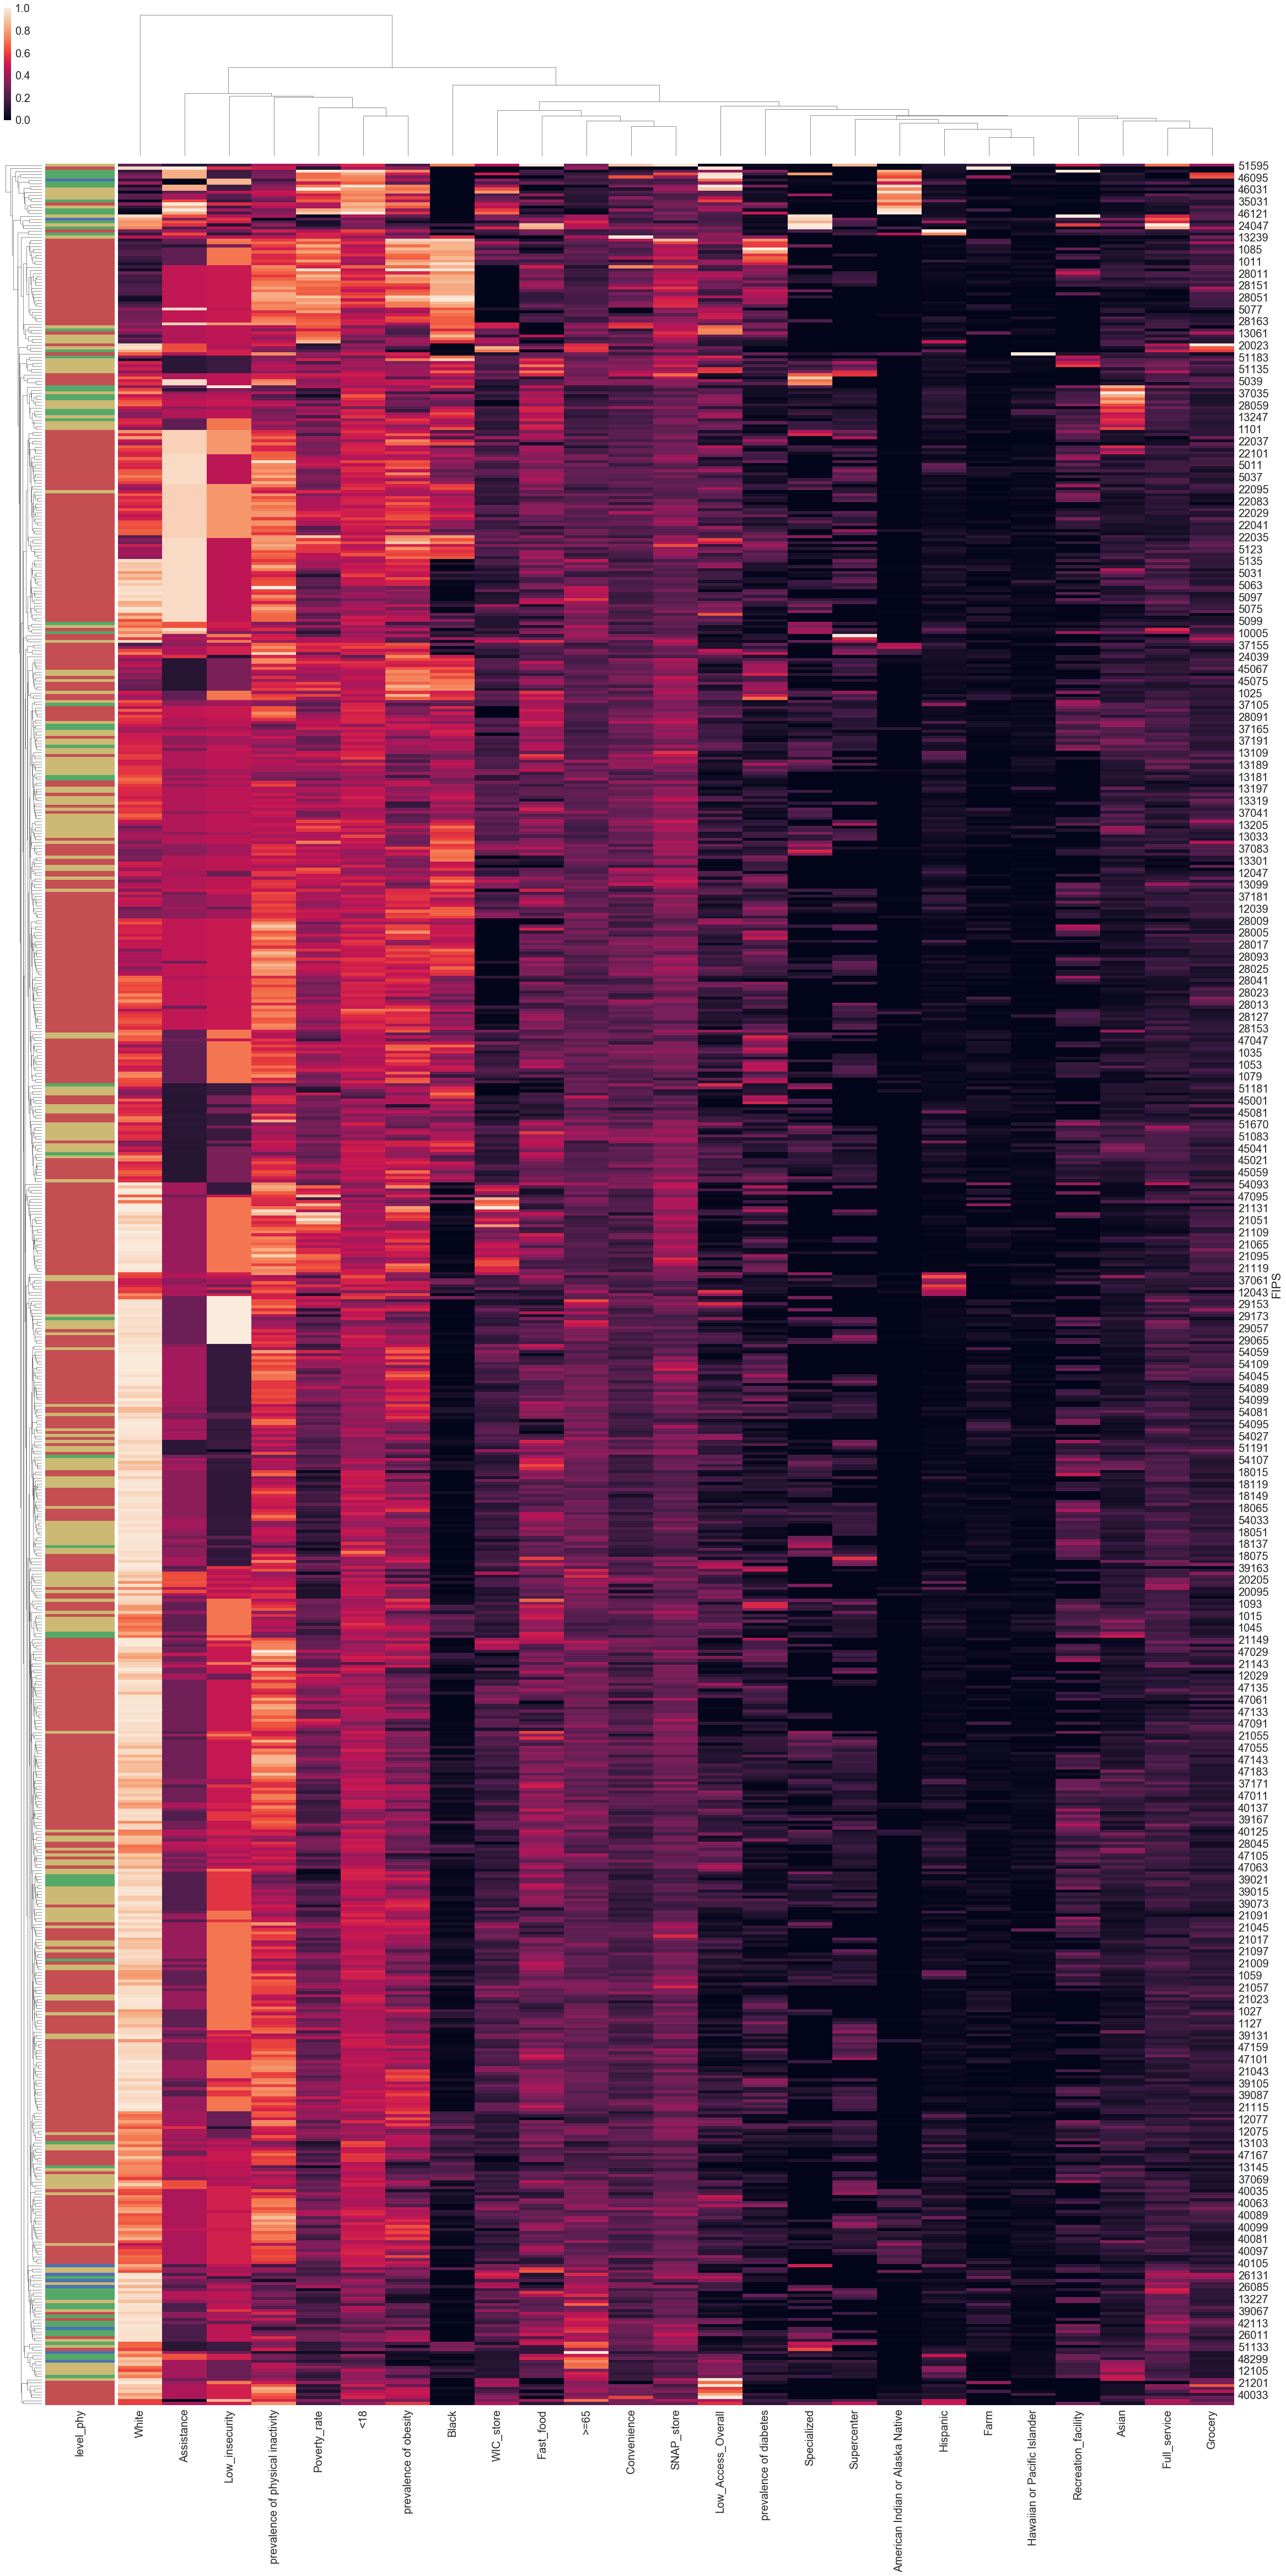

In [29]:
df_subset=normed_df[normed_df['level_diabetes']==3]


sns.set(font_scale=2)

grouptag='level_phy'

row_colors = normed_df[grouptag].map(lut)
g = sns.clustermap(df_subset[df_subset.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,80), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.show()

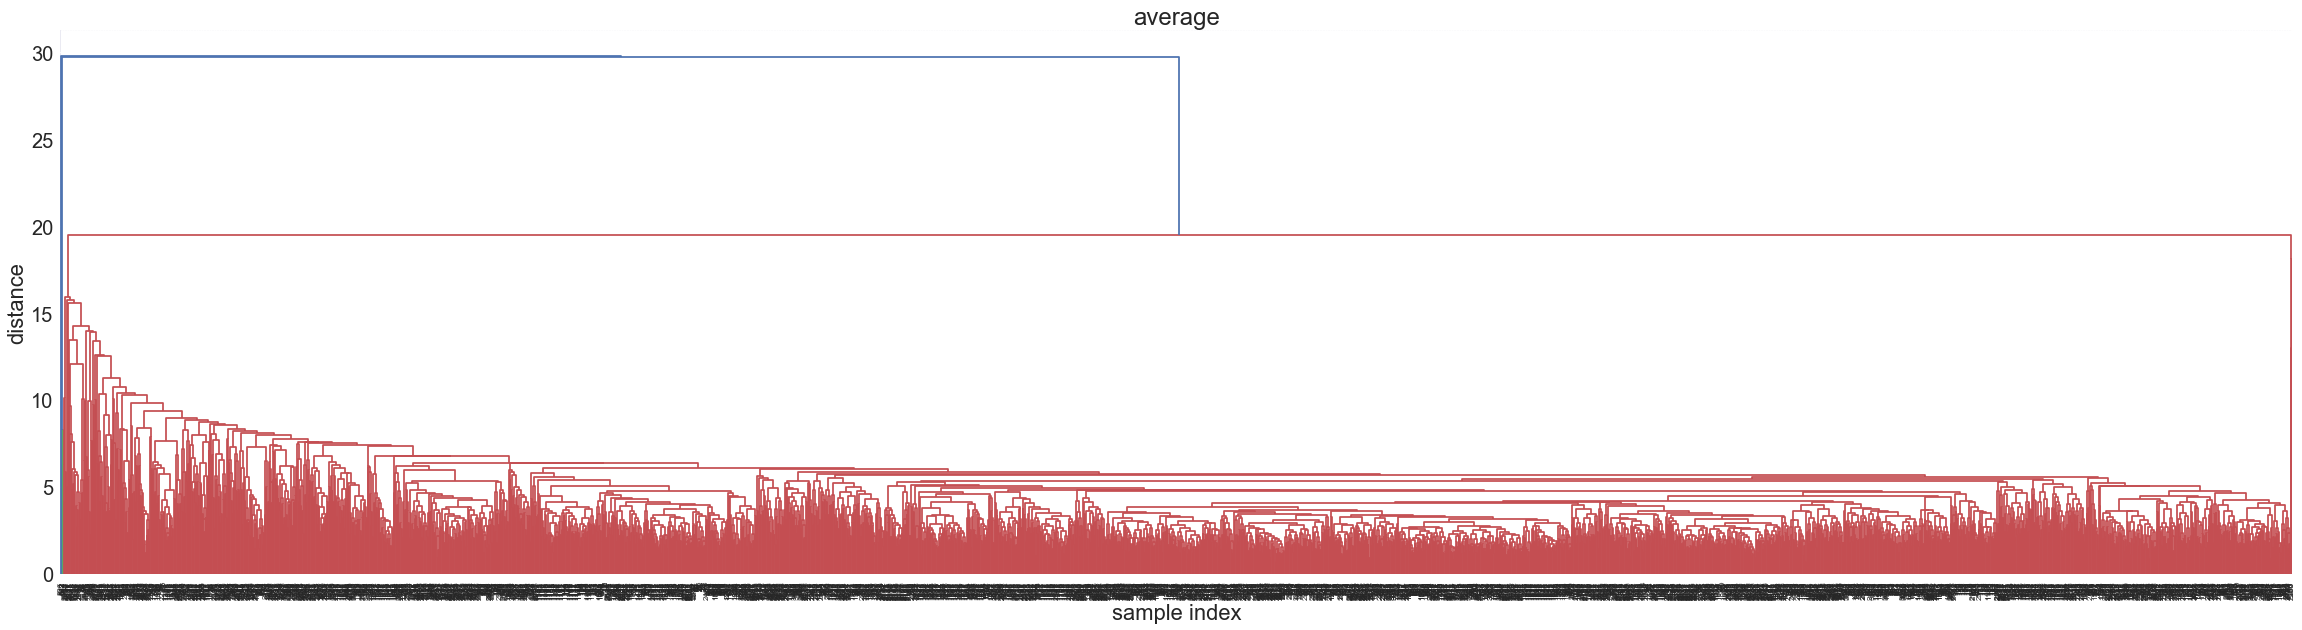

In [44]:
X=normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])]
Z = linkage(X, 'average')
plt.figure(figsize=(40, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('average')
plt.show()



In [31]:
from scipy.cluster.hierarchy import cut_tree, fcluster

cutree = cut_tree(Z, n_clusters=3)


In [55]:
assignments = fcluster(Z,5,'distance')
set(assignments)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [61]:
normed_df['group']=assignments

In [68]:
from collections import Counter
counter=Counter(assignments)

In [82]:
groups_to_plot=[l for l in counter.keys() if counter[l]>=40]

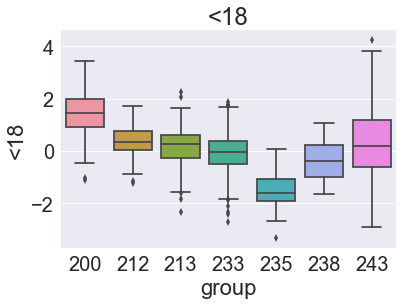

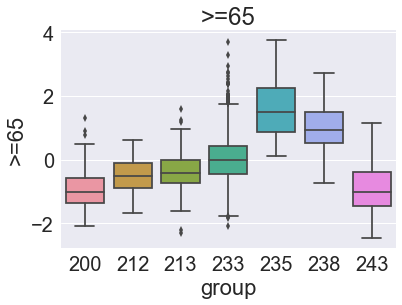

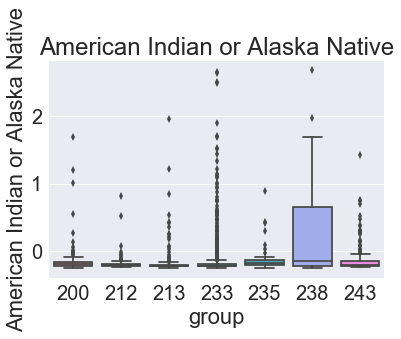

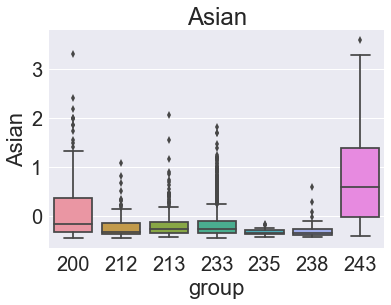

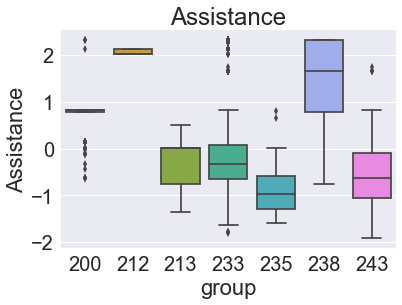

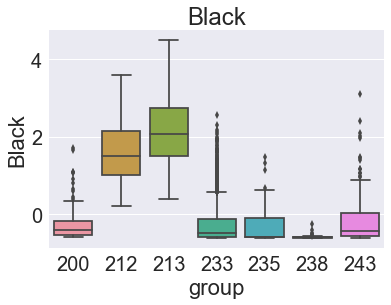

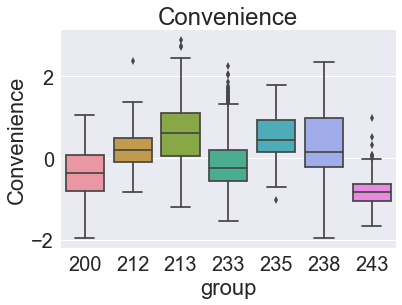

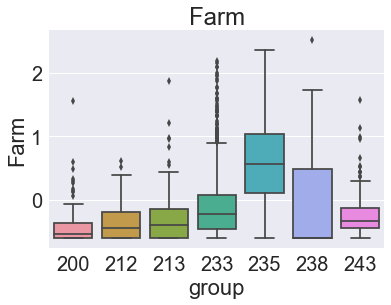

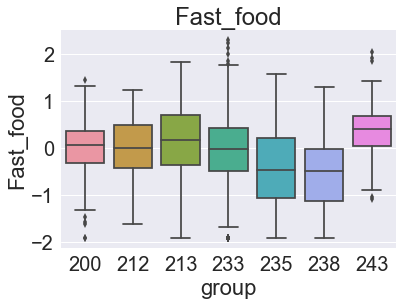

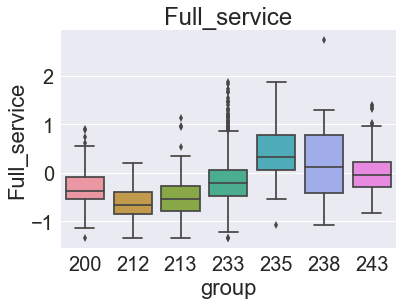

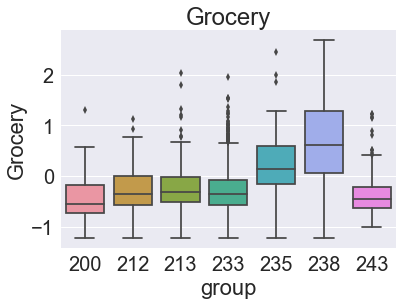

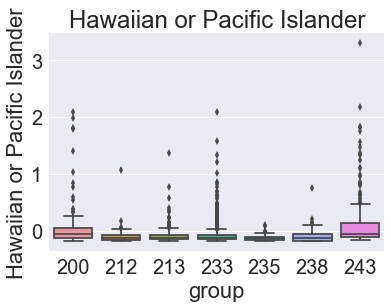

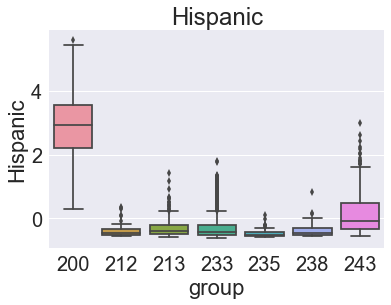

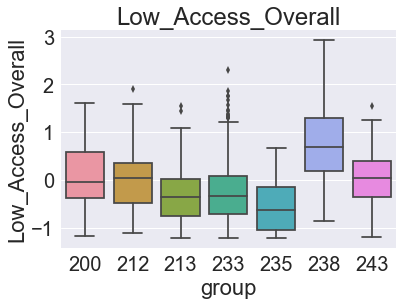

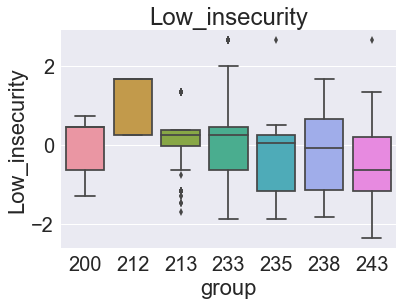

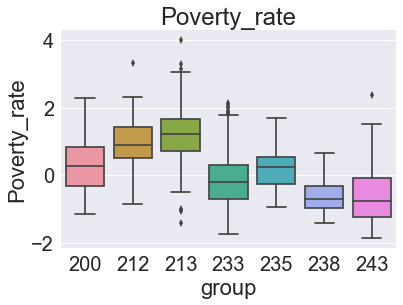

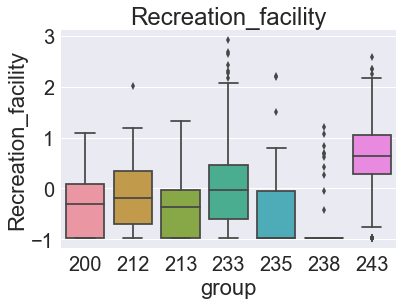

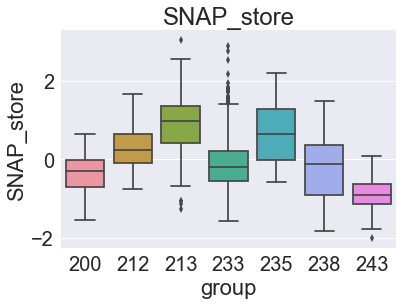

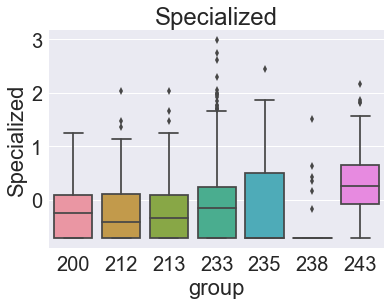

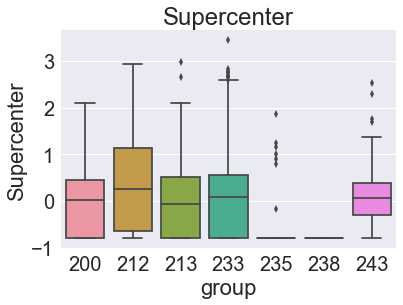

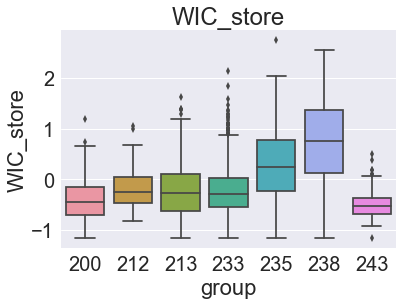

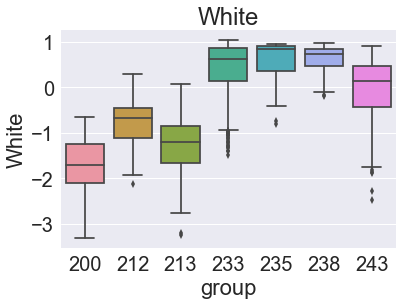

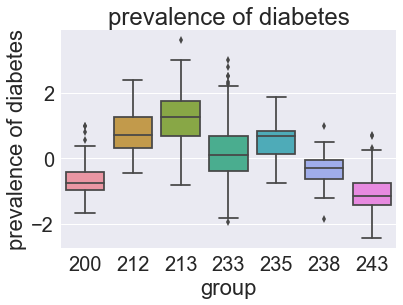

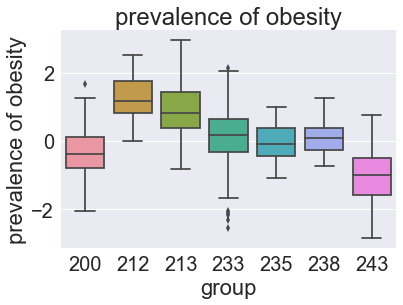

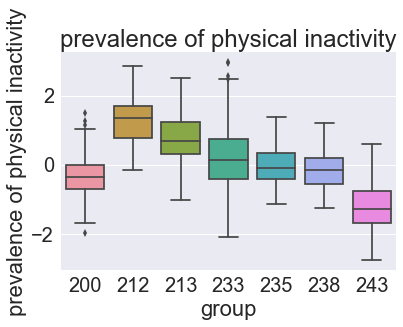

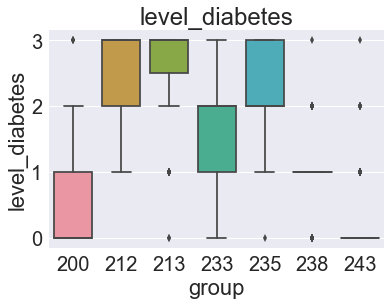

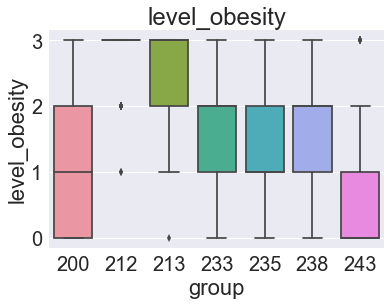

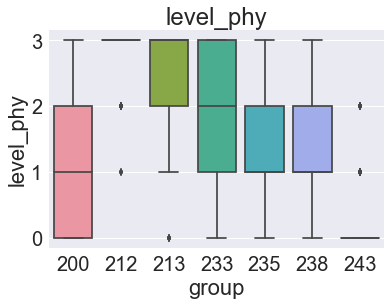

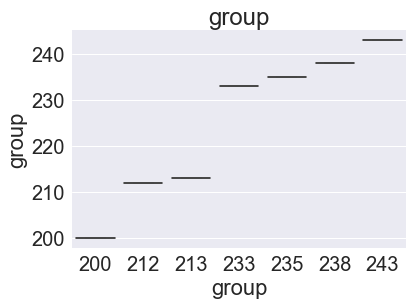

In [83]:
#colors=['b','g','y','r', 'orange','m', 'purple']

for c in normed_df[normed_df['group'].isin(groups_to_plot)].columns:
    plt.figure()
    sns.boxplot(x='group', y=c, data=normed_df[normed_df['group'].isin(groups_to_plot)])
    plt.title(c)
    plt.legend()
    plt.show()

In [86]:
small_groups_to_plot=[l for l in counter.keys() if (counter[l]<40) & (counter[l]>=10)]

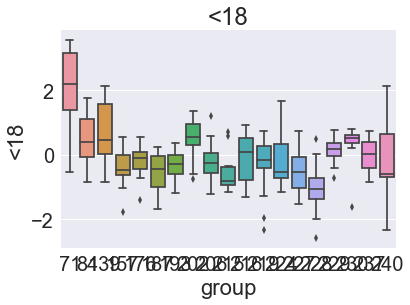

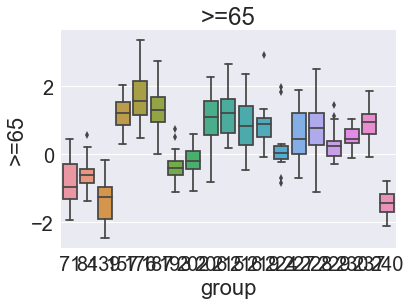

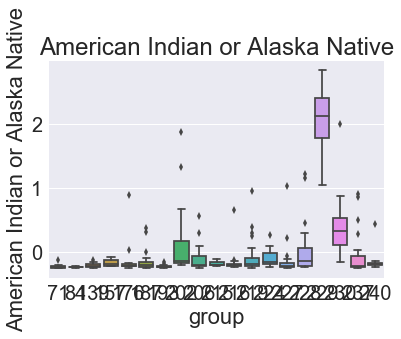

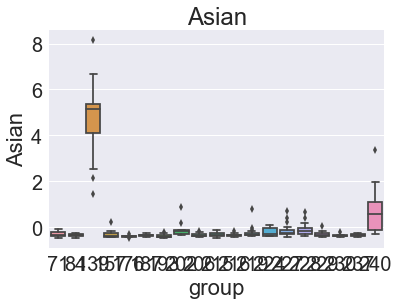

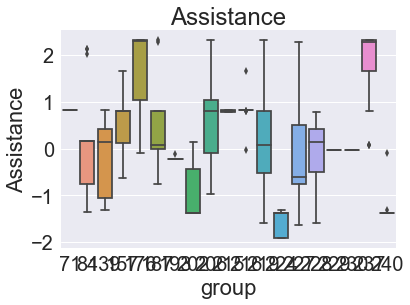

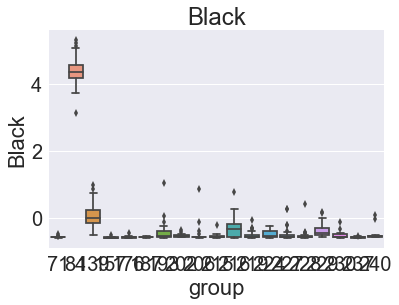

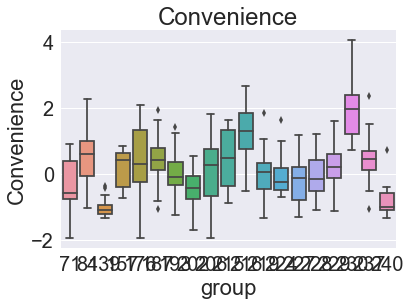

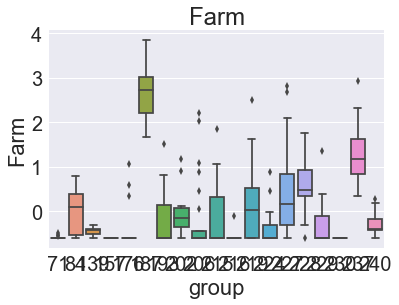

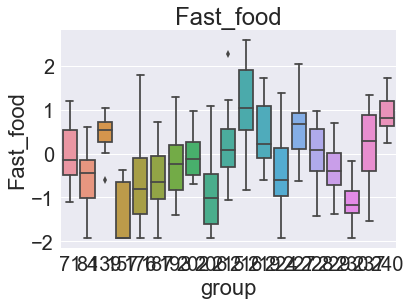

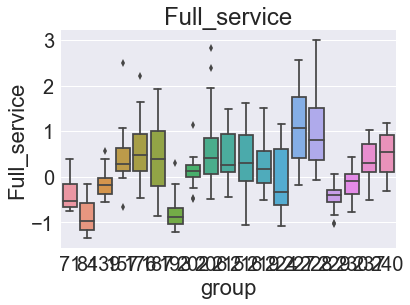

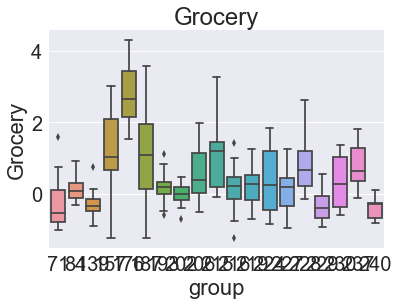

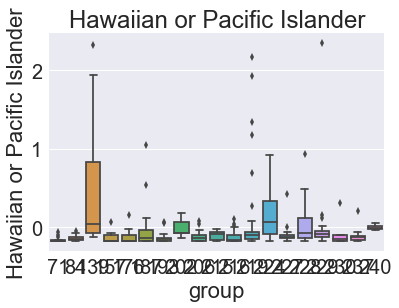

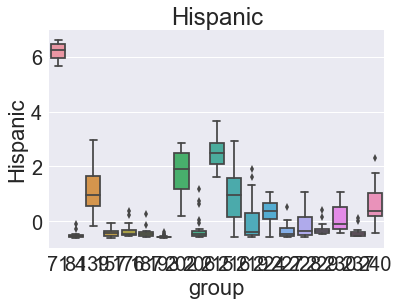

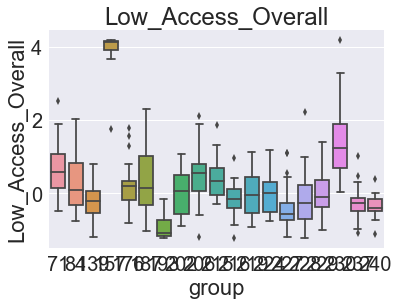

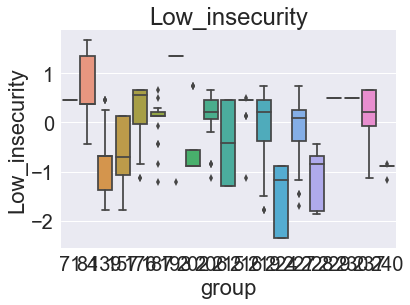

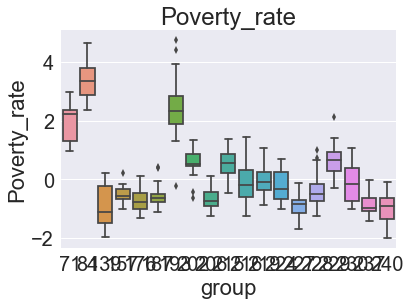

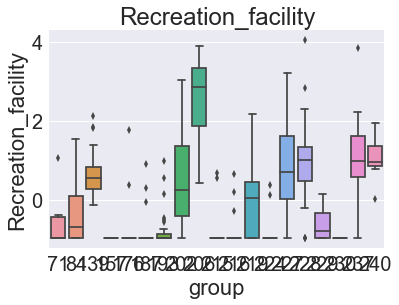

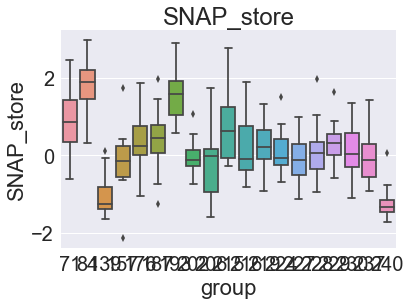

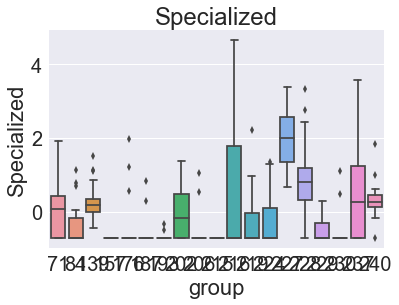

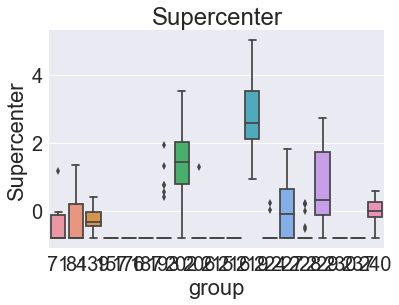

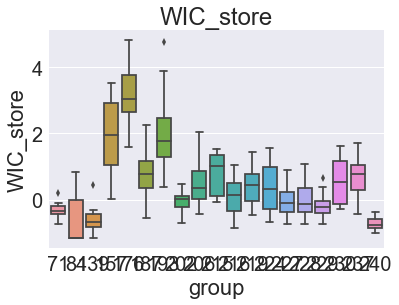

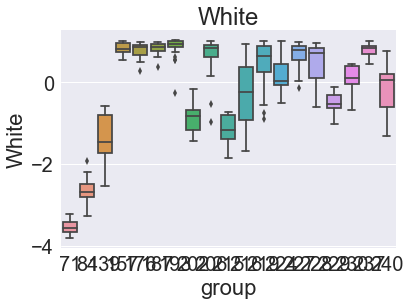

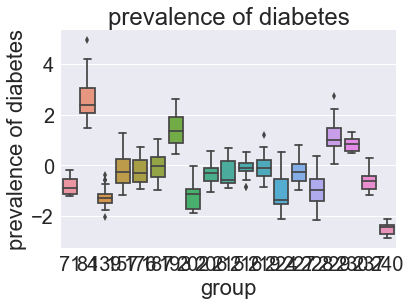

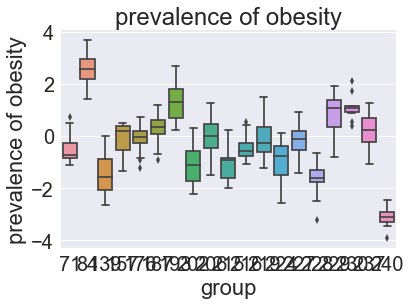

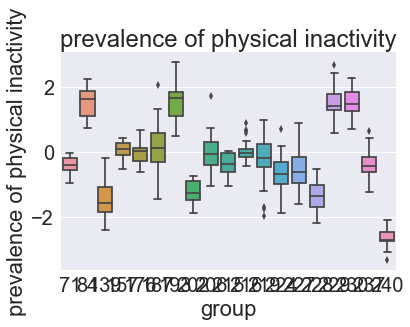

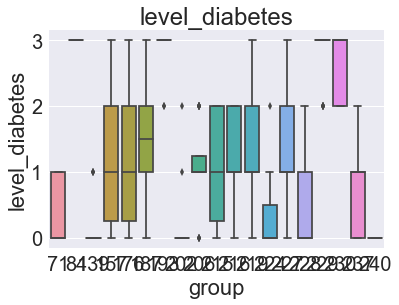

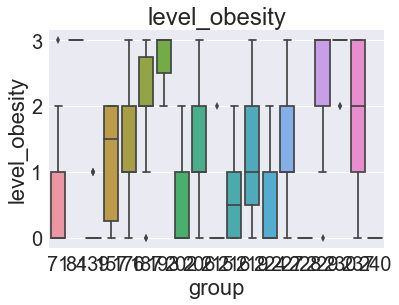

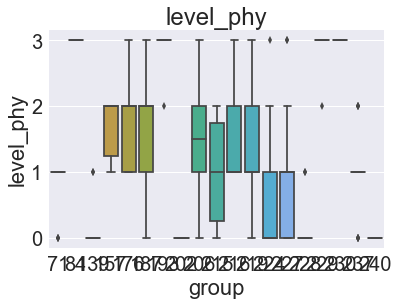

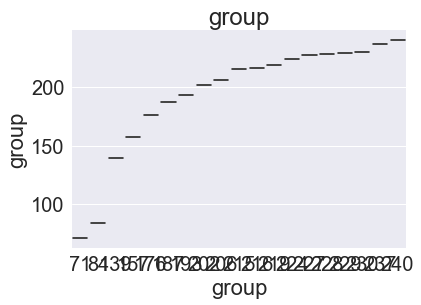

In [87]:
#colors=['b','g','y','r', 'orange','m', 'purple']

for c in normed_df.columns:
    plt.figure()
    sns.boxplot(x='group', y=c, data=normed_df[normed_df['group'].isin(small_groups_to_plot)])
    plt.title(c)
    plt.legend()
    plt.show()

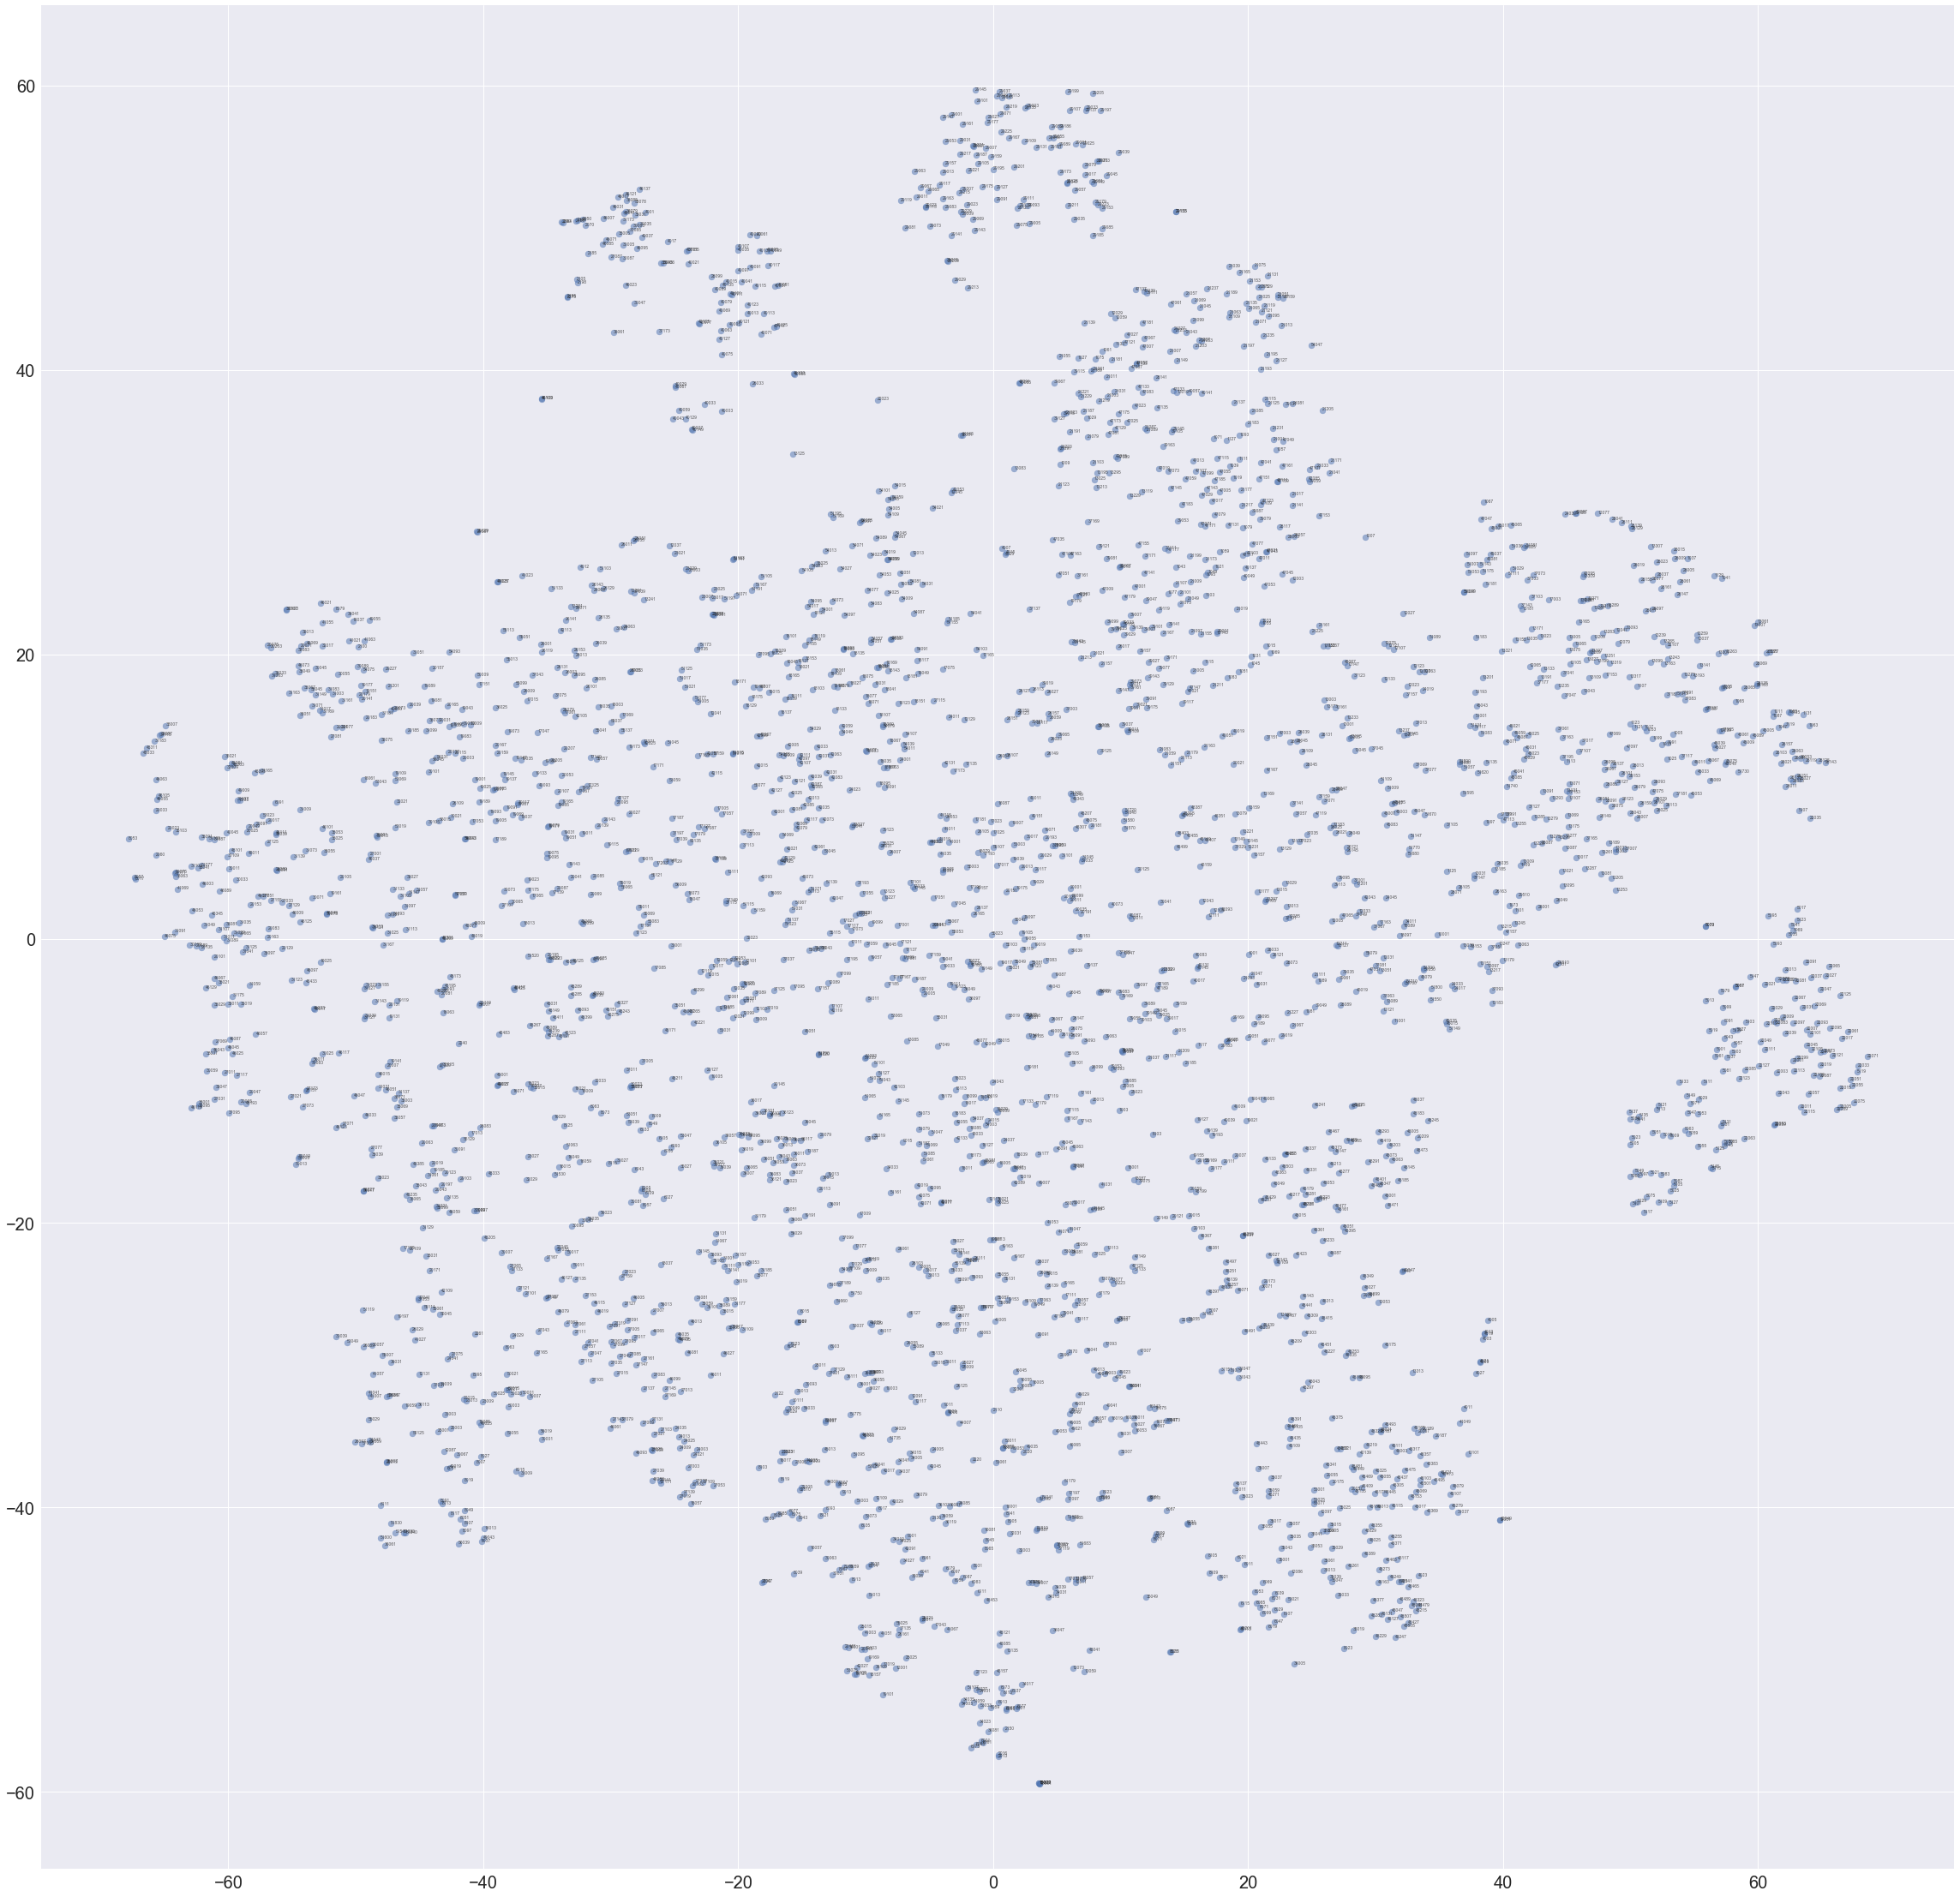

In [91]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(normed_df[normed_df.columns.difference(['group','level_diabetes','level_obesity','level_phy'])])

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(40,40))
plt.scatter(xs, ys, alpha=0.5)
# Scatter plot


# Annotate the points
for x, y, fips in zip(xs, ys, normed_df.index):
    plt.annotate(fips, (x, y), fontsize=5, alpha=0.75)
plt.show()


In [ ]:
df_0=normed_df[normed_df['level of diabetes']==3]
g = sns.clustermap(df_0[df_0.columns.difference(['level of diabetes'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1)
plt.show()

C:\anaconda\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


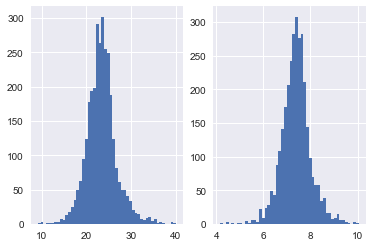

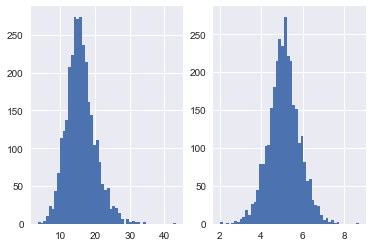

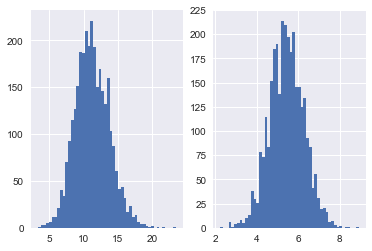

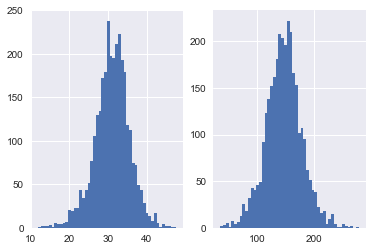

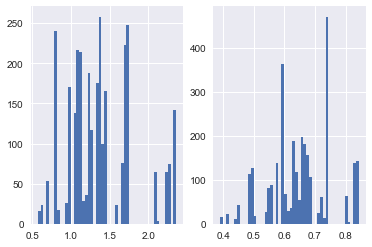

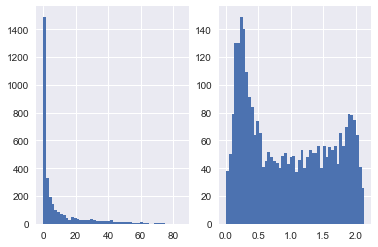

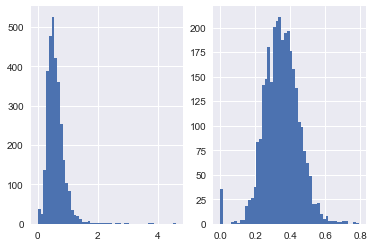

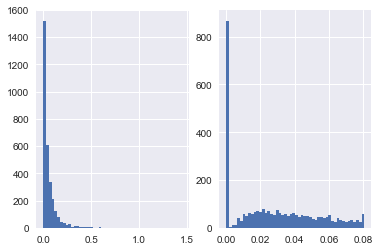

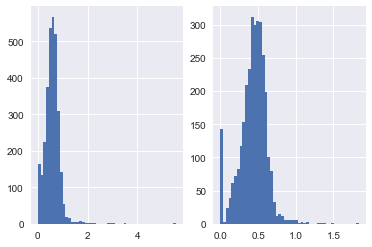

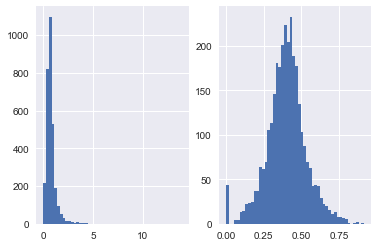

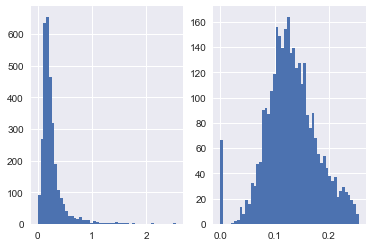

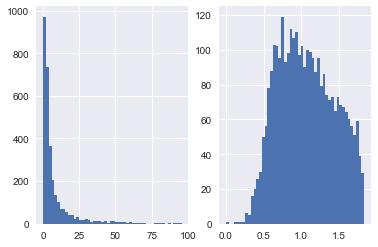

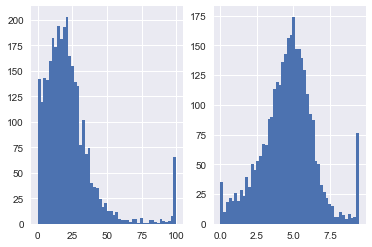

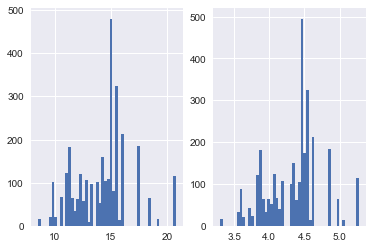

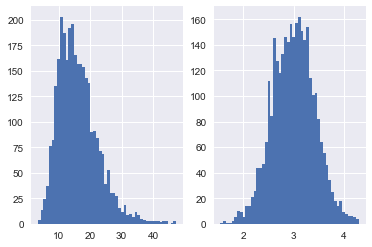

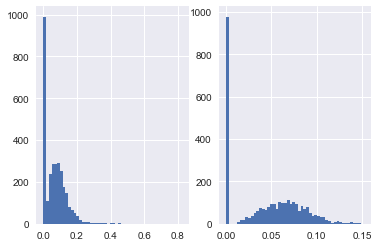

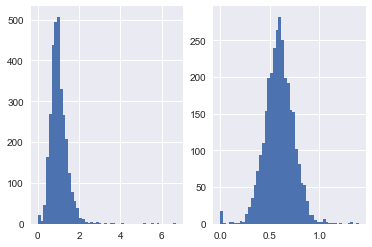

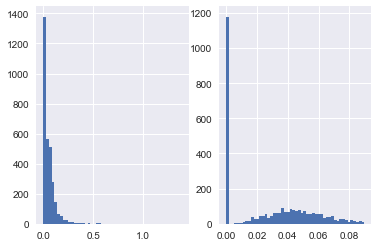

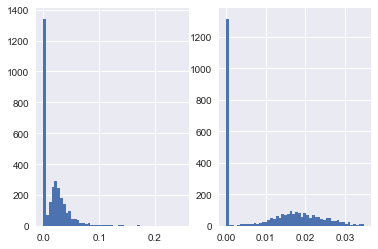

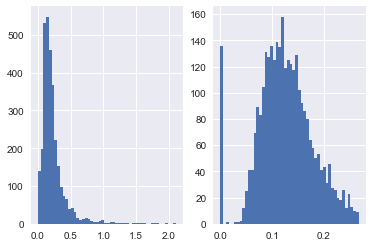

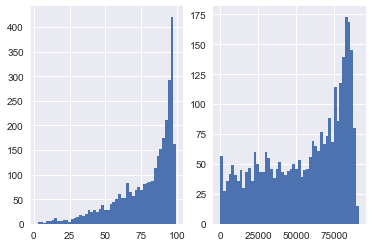

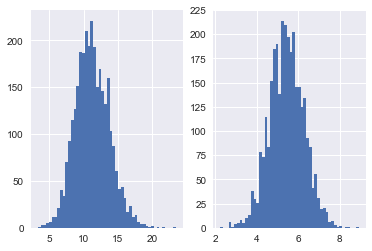

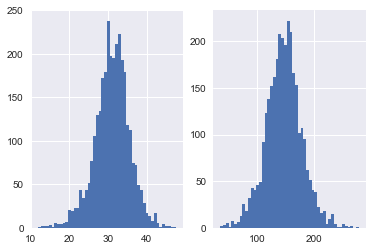

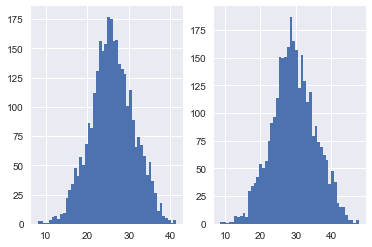

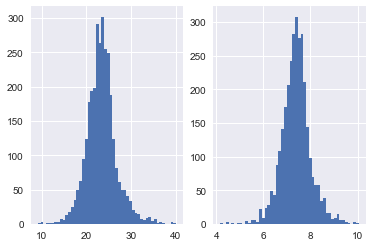

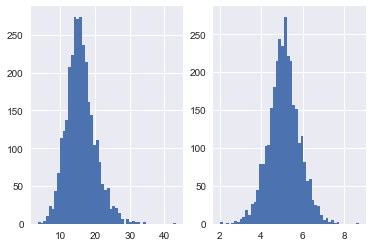

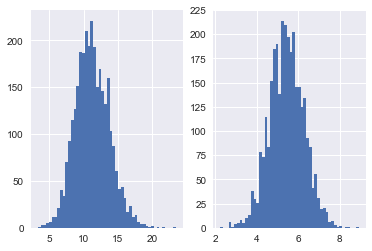

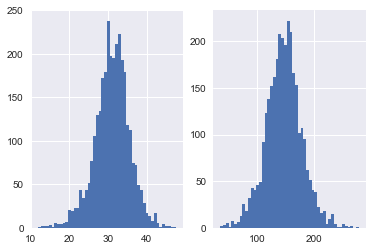

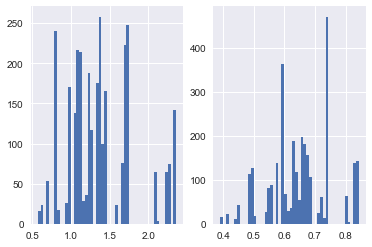

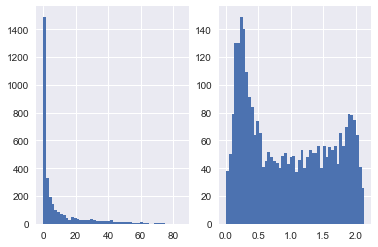

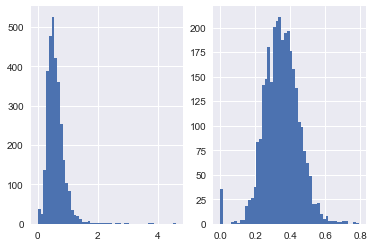

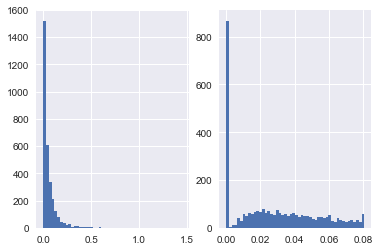

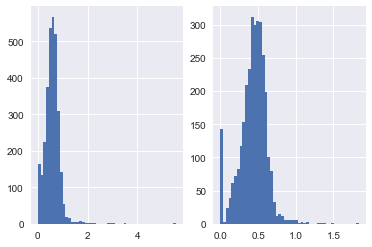

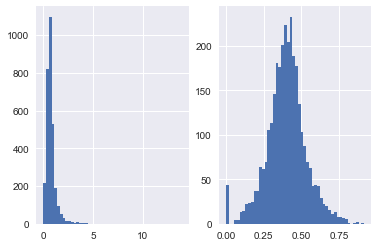

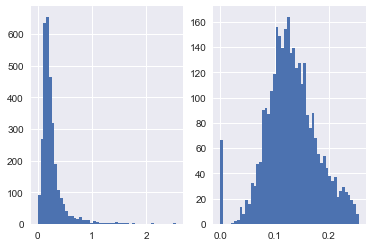

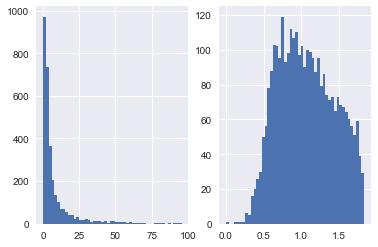

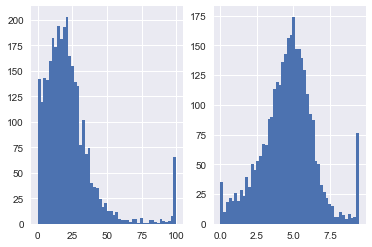

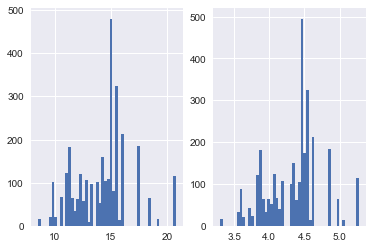

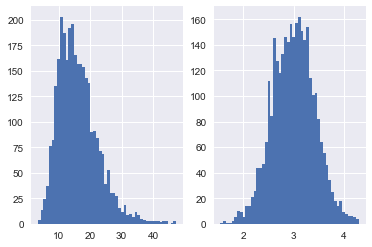

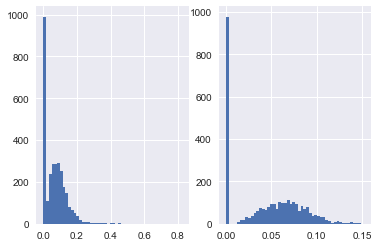

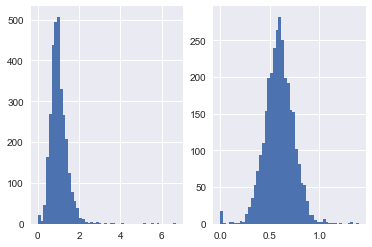

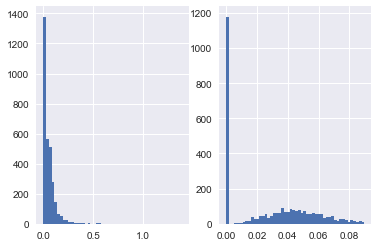

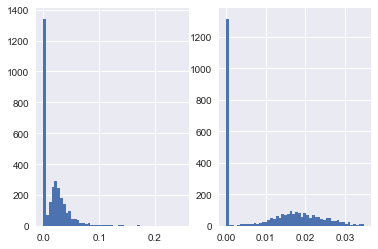

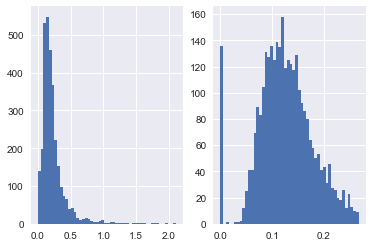

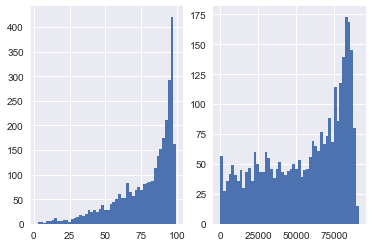

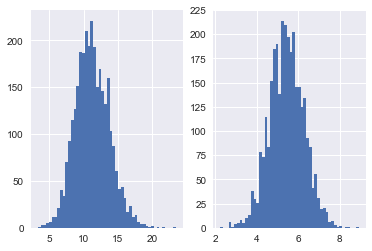

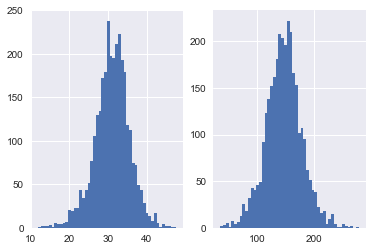

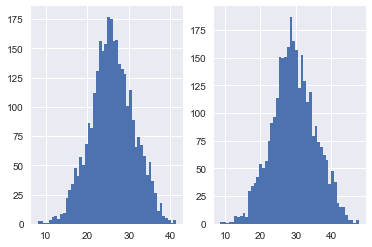

In [93]:
for c in df_for_scale.columns:
    plt.figure()
    plt.title(c)
    plt.subplot(1,2,1)
    df_for_scale[c].hist(bins=50)
    plt.subplot(1,2,2)
    df_transformed[c].hist(bins=50)
plt.show()

K means clustering

In [284]:
#PCA analysis using the standardized data
## compute the covariance matrix
corr=normed_df[normed_df.columns.difference(['Low_insecurity','level_diabetes','level_obesity','level_phy'])].corr()

In [285]:
evals, evecs = np.linalg.eigh(corr)

In [286]:
df_eigh=pd.DataFrame()
df_eigh['evalue']=evals
for i in range(len(evals)):
    df_eigh['evec_'+str(i+1)]=evecs[i,:]
df_eigh.index=corr.index

In [287]:
df_eigh=df_eigh.sort_values(by='evalue', ascending=False)
df_eigh['exp_var']=df_eigh['evalue']/df_eigh['evalue'].sum()
df_eigh['cum_exp_var']=np.cumsum(df_eigh['exp_var'])

In [288]:
df_eigh['cum_exp_var']

prevalence of physical inactivity    0.179744
prevalence of obesity                0.317538
prevalence of diabetes               0.415354
White                                0.491658
WIC_store                            0.547693
Supercenter                          0.598407
Specialized                          0.642429
SNAP_store                           0.683693
Recreation_facility                  0.720718
Poverty_rate                         0.754202
Low_Access_Overall                   0.787003
Hispanic                             0.818444
Hawaiian or Pacific Islander         0.846266
Grocery                              0.872699
Full_service                         0.896724
Fast_food                            0.916088
Farm                                 0.932963
Convenience                          0.948691
Black                                0.962152
Assistance                           0.974094
Asian                                0.984936
American Indian or Alaska Native  

explained variance exceeds 95% at variable 'Convenience', where we keep that variables from top until 'Convenience', so the dimentions decrease from 24 to 19

In [289]:
#PCA using Sklearn 
from sklearn.decomposition import PCA

explained_var=list()
for d in range(1,len(normed_df.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df)
    explained_var.append(sum(pca.explained_variance_ratio_))

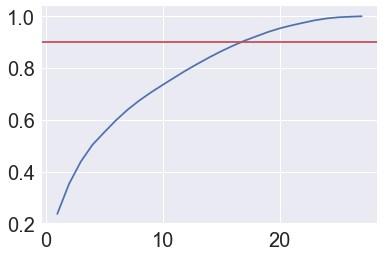

In [290]:
plt.plot(range(1,len(normed_df.columns)), explained_var)
plt.axhline(y=0.9, color='r')
plt.show()

In [268]:
#90% of variance can be explained by 16 components out of total 24 variables
pca = PCA(n_components=16)
pca.fit(normed_df)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [269]:
data_transformed=pca.transform(normed_df)
df_transformed=pd.DataFrame(data_transformed, index=normed_df.index)

segmentation based on diabetes and obesity prevalence

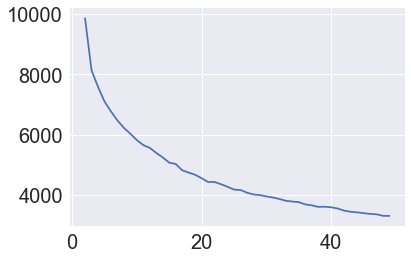

In [270]:
from sklearn.cluster import KMeans

normed_df['level_diabetes']=pd.qcut(normed_df['prevalence of diabetes'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_obesity']=pd.qcut(normed_df['prevalence of obesity'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_phy']=pd.qcut(normed_df['prevalence of physical inactivity'], [0, .25, .5, .75, 1.], labels=False)

df_transformed=pd.concat([df_transformed, normed_df.loc[:, ['level_diabetes','level_obesity','level_phy']]], axis=1)
df_subset=df_transformed[df_transformed['level_diabetes']==3]

K=50
dists=list()
for i in range(2,K):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_subset[df_subset.columns.difference(['level_diabetes','level_obesity','level_phy'])])
    dists.append(kmeans.inertia_)

plt.plot(range(2,K), dists)
plt.show()


#plt.show()  

#scaled_df['group']=kmeans.labels_
#df_for_scale['group']=kmeans.labels_

In [303]:
from sklearn.cluster import KMeans

dists=list()
for n in range(100):
    kmeans = KMeans(n_clusters=4, random_state=40).fit(df_subset[df_subset.columns.difference(['level_diabetes','level_obesity','level_phy'])])
    dists.append(kmeans.inertia_)

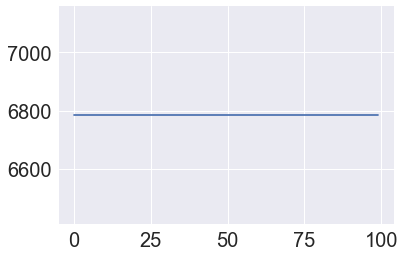

In [274]:
plt.plot(range(100), dists)
plt.show()

In [307]:
df_subset=df_for_scale[df_transformed['level_diabetes']==3]
df_subset['group']=kmeans.labels_

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [348]:
colors=['b','g','y','r', 'm', 'purple']
for c in df_subset.columns:
    plt.figure()
    for n in df_subset['group'].unique():
        df_subset[df_subset['group']==n][c].hist(bins=50, color=colors[n], normed=True)
    plt.title(c)
    plt.show()
   

IndexError: list index out of range

In [ ]:
#among counties with highest level of 